# ANALYSIS OF FOOD PRODUCTION AND SUPPLY IN AFRICA IN RELATION TO ITS POPULATION

# INTRODUCTION

Africa stands as one of the globe's crucial breadbaskets, housing both influential agricultural producers and millions of smallholder farmers who serve as the backbone of their communities and contribute to the global food supply.

The backbone of Africa's economy lies in agriculture, serving as the predominant economic activity. Employing approximately two-thirds of the continent's workforce, agriculture contributes significantly, accounting for an average of 30 to 60 percent of gross domestic product and around 30 percent of export value for each country.

However, the challenge of food security looms large over Africa, impacting individuals who struggle to attain physical, social, and economic access to sufficient, safe, and nutritious food. This access is essential for meeting their dietary needs and preferences, promoting an active and healthy life.

This project focuses on analyzing two distinct datasets—namely, food production and food supply datasets. These comprehensive datasets encapsulate information spanning the years 2004 to 2013 across 45 African countries, they provide a valuable lens through which we can dissect and understand the dynamics of food production and supply in the African context.

# Aim of the Project

Using the food production and consumption/supply dataset, the aim of this project is to tell a story of how the world food shortage problem can be solved using appropriate visuals, making each variable in the dataset purposeful without leaving anything behind, using Python programming language.

The followings insights/questions will be gained:

* What is the general trend in total food production across all African countries from 2004 to 2013?

* Which Country produces food the most?

* What food products/items were produced the most?

* What are the least produced Food items?

* What are the top 20 Food produced by Nigeria from 2004 to 2013

* What are the top 20 Food produced by Egypt from 2004 to 2013

* What are the top 20 Food produced by South Africa from 2004 to 2013

* What are the top 20 Food produced by Ethiopia from 2004 to 2013

* What are the top 20 Food produced by United Republic of Tanzania from 2004 to 2013

* Who are the Top Rice, Cassava, Wheat, Maize and products producing countries?

* Top Rice Producing countries

* Top Cassava Producing Countries

* Top Wheat Producing countries

* Top Maize Producing countries

* Trends in food production and consumption over the years.

* Average and median food production, the outliers, Quartile, and interquartile ranges.

* A comparison between average food consumption and production for each year.


# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.style.use ("ggplot")
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

# Data Gathering

## Food Production

In [2]:
# Load the food production dataset

food_production = pd.read_csv('Africa Food Production (2004 - 2013).csv')
food_production

Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]

# Data Assessment

In [3]:
# check the information of the dataset

food_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [4]:
# check the statistical description of the dataset

food_production.describe()

Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [5]:
# check the data types of the columns

food_production.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [6]:
# check for missing values

food_production.isna().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [7]:
# check for duplicates in the rows

food_production.duplicated().sum()

0

In [8]:
# check for the number of unique values in the columns

food_production.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [9]:
# check for the number of unique countries

food_production['Country'].nunique()

45

In [10]:
# check for the number of unique food items

food_production['Item'].nunique()

94

In [11]:
# check for the number of unique values

food_production['Value'].nunique()

2134

# Data Cleaning

In [12]:
# convert the year column to datetime

food_production['Year'] = pd.to_datetime(food_production['Year'], format="%Y").dt.year

In [13]:
# create a unit column containing the symbol of kilotone, which is the unit of the numbers in the Value column
food_production['Unit'] = 'kt'

In [14]:
# check if the column has been added

food_production.head

<bound method NDFrame.head of         Country                Item  Year  Value Unit
0       Algeria  Wheat and products  2004   2731   kt
1       Algeria  Wheat and products  2005   2415   kt
2       Algeria  Wheat and products  2006   2688   kt
3       Algeria  Wheat and products  2007   2319   kt
4       Algeria  Wheat and products  2008   1111   kt
...         ...                 ...   ...    ...  ...
23105  Zimbabwe         Crustaceans  2009      0   kt
23106  Zimbabwe         Crustaceans  2010      0   kt
23107  Zimbabwe         Crustaceans  2011      0   kt
23108  Zimbabwe         Crustaceans  2012      0   kt
23109  Zimbabwe         Crustaceans  2013      0   kt

[23110 rows x 5 columns]>

In [15]:
food_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
 4   Unit     23110 non-null  object
dtypes: int64(2), object(3)
memory usage: 902.9+ KB


In [16]:
# groupby Country and year to see the total value for each product for different years
prod = food_production.groupby(['Country', 'Year'])
prod.first()

Item  Value Unit
Country  Year                                
Algeria  2004  Wheat and products   2731   kt
         2005  Wheat and products   2415   kt
         2006  Wheat and products   2688   kt
         2007  Wheat and products   2319   kt
         2008  Wheat and products   1111   kt
...                           ...    ...  ...
Zimbabwe 2009  Wheat and products     12   kt
         2010  Wheat and products     18   kt
         2011  Wheat and products     23   kt
         2012  Wheat and products     20   kt
         2013  Wheat and products     25   kt

[450 rows x 3 columns]

In [17]:
# Group by Country, Year and Value to see the sum of items produced each year in each country
pd.DataFrame(food_production.groupby(['Country','Year'])['Value'].sum())

Value
Country  Year       
Algeria  2004  15536
         2005  15667
         2006  16417
         2007  14763
         2008  13841
...              ...
Zimbabwe 2009   5754
         2010   6777
         2011   7551
         2012   8173
         2013   7914

[450 rows x 1 columns]

######  
We have a total of 45 Countries, 10 years and 94 food items

# Exploratory Data Analysis (EDA)

#### What is the general trend in total food production across all African countries from 2004 to 2013?

Text(0, 0.5, 'Value (kiloton)')

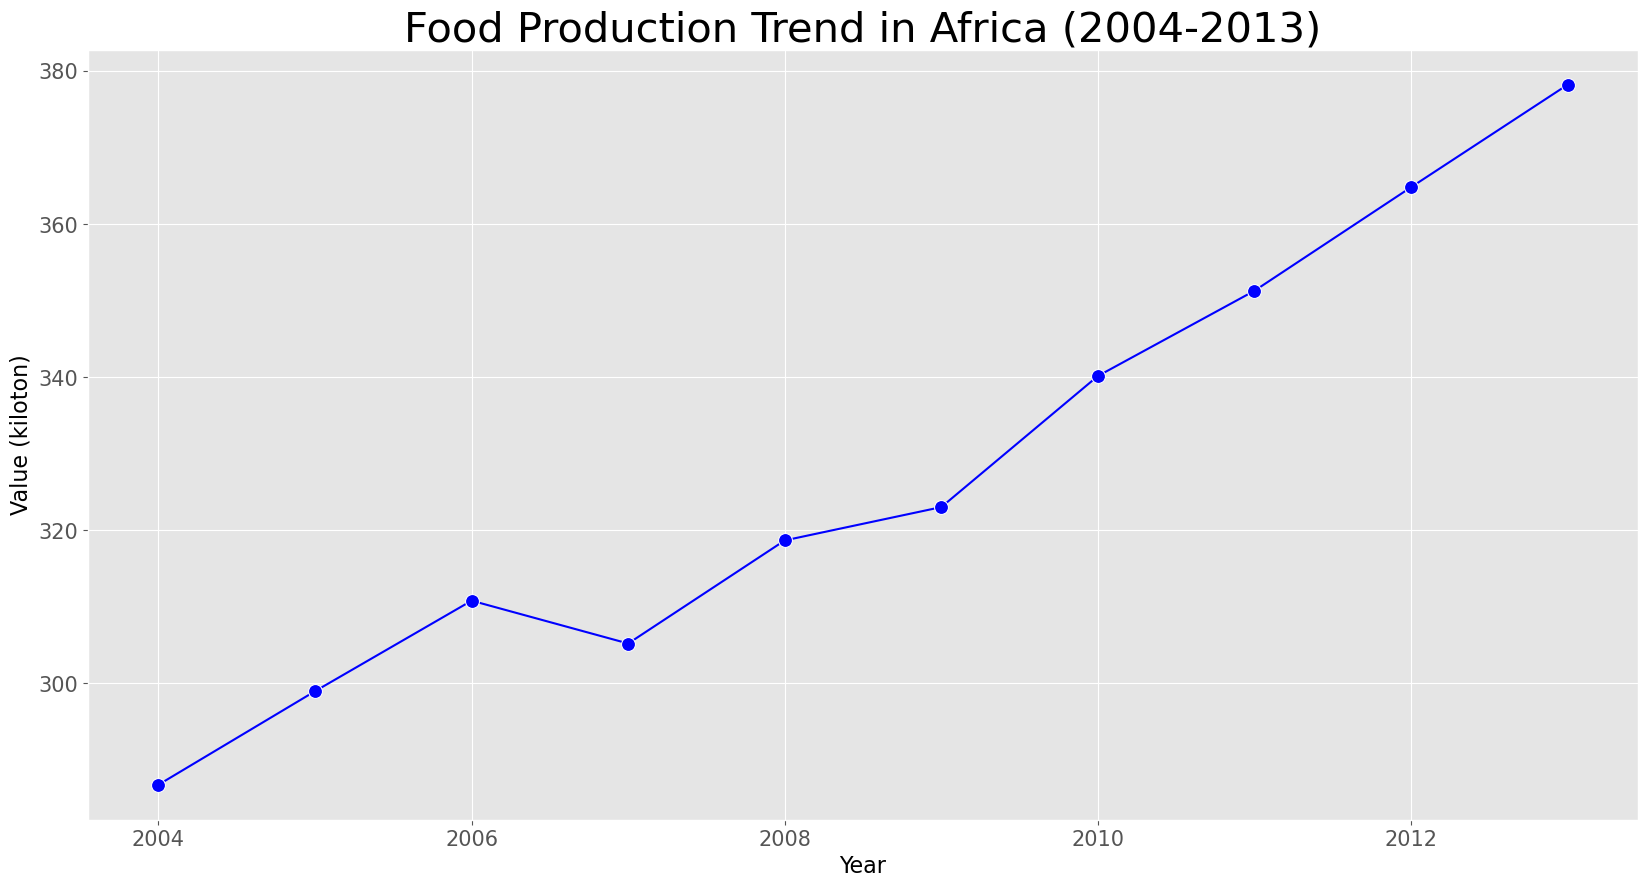

In [18]:
# visualizing the food production trend over the years

plt.figure(figsize=(20, 10))

#set label sizes for axes, xtick and ytick
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

sns.lineplot(data=food_production, x="Year", y="Value", marker='o', markersize=10, ci=None, color='b')
plt.title('Food Production Trend in Africa (2004-2013)', fontsize=30)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value (kiloton)', fontsize=16)


In [19]:
# visualizing the food production trend over time with plotly(Histogram plot)
px.histogram(food_production, x='Year', y='Value', color ='Year', title = 'Food Production Trend Over time (2004 - 2013)',
            labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})

####
We see that food production in Africa increased as the year increased. But we see the production value decreased in 2007 and increased again in 2008 till 2013.

### Which Country produces food the most?

In [20]:
# Group by country and sum the production
country_production = food_production.groupby('Country')['Value'].sum().sort_values(ascending=False)

country_production

Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Sudan                           301584
Ghana                           295004
Uganda                          278421
Morocco                         271821
Kenya                           256872
Cameroon                        197670
Angola                          195499
Algeria                         188650
Cote d'Ivoire                   182486
Mozambique                      157584
Malawi                          153717
Madagascar                      133071
Burkina Faso                    100129
Rwanda                           95174
Tunisia                          92713
Mali                             92292
Benin                            88072
Niger                            86808
Zambia                           82701
Zimbabwe                         73316
Guinea           

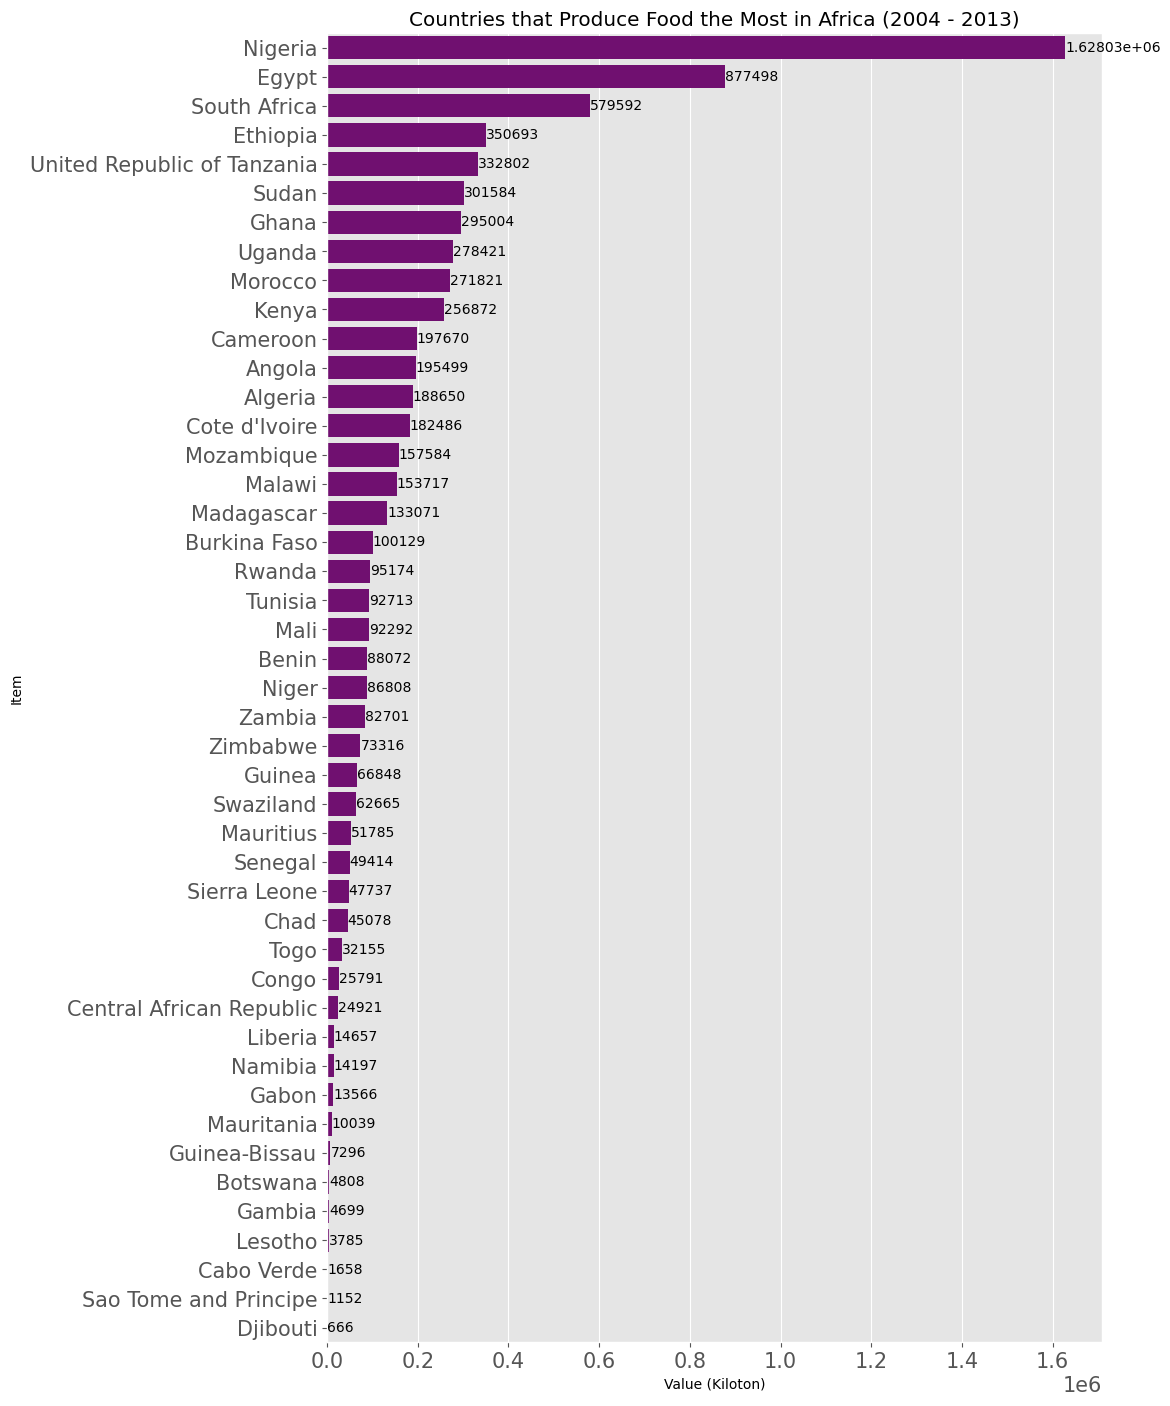

In [21]:
# Visualize the results

top_producing=pd.DataFrame(food_production.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()[:45]

plt.rcParams['figure.figsize'] = (10, 17)

ax = sns.barplot(y = top_producing.Country, x = top_producing.Value, data = top_producing, color='purple')

for i in ax.containers:
    ax.bar_label(i)
    
plt.gca().set_title("Countries that Produce Food the Most in Africa (2004 - 2013)")
plt.xlabel('Value (Kiloton)')
plt.ylabel('Item')


plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show();


* From the Table and chart above we can see that Nigeria is the Top food producing country in Africa between 2004 to 2013 with a toal food production of 1,628,030 kiloton. followed by Egypt with total of 877,498 kiloton and South Africa with total of 579,592

* While Cabo Verde, Sao Tome and Principe and Djibouti were the coutries least food producing country in Africa between 2004 to 2013 witha food production of 1658 kt, 1152 kt, 666kt respectively

### What food products/items were produced the most?

In [22]:
# create a dataframe of the most produced food items

most_produced = pd.DataFrame(food_production.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()[:20]
most_produced

Item    Value
0       Cassava and products  1118948
1                 Sugar cane   887008
2         Maize and products   574948
3                       Yams   511523
4          Vegetables, Other   410403
5    Milk - Excluding Butter   380380
6       Sorghum and products   241080
7         Wheat and products   229875
8       Beverages, Fermented   227037
9      Potatoes and products   221092
10                 Plantains   186775
11     Tomatoes and products   172192
12  Rice (Milled Equivalent)   156775
13       Millet and products   155193
14                   Bananas   153785
15            Sweet potatoes   145694
16             Fruits, Other   140167
17              Roots, Other   136266
18    Sugar (Raw Equivalent)    99546
19                      Beer    92630

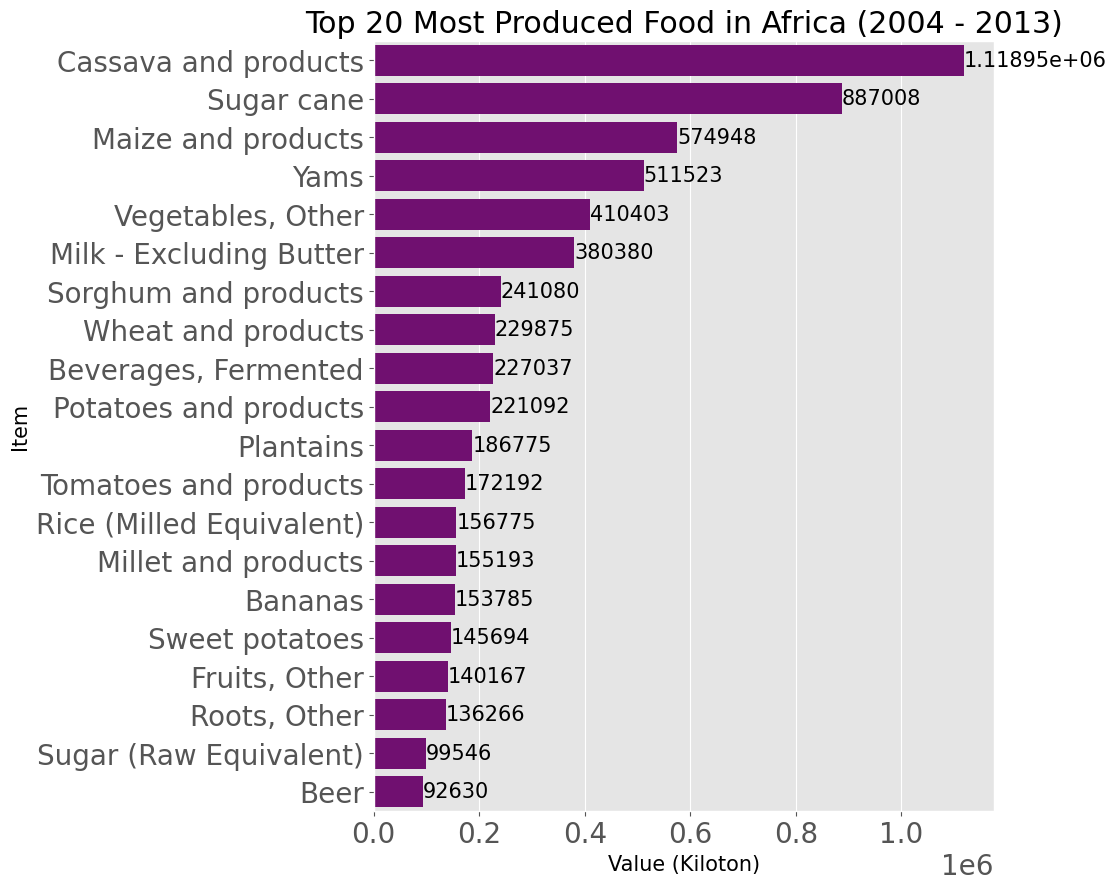

In [23]:
# visualizing the most produced food items with Seaborn(Bar plot)

food_produced=pd.DataFrame(food_production.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()[:20]


plt.rcParams['figure.figsize'] = (8, 10)

ax = sns.barplot(y = food_produced.Item, x = food_produced.Value, data = food_produced, color='purple')

for i in ax.containers:
    ax.bar_label(i)
    
plt.gca().set_title("Top 20 Most Produced Food in Africa (2004 - 2013)")
plt.xlabel('Value (Kiloton)')
plt.ylabel('Item')


plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show();

* From the table and barplot above, we could observe that top most produced food in Africa between 2004 and 2013 are Cassava, Sugar Cane, Maize and products, Yam, Vegtables, and Milk (excluding butter).

* While the least produced food items are Cloves, Molluscs/Other, Pepper, Fish/Liver Oil, Aquatic Animals/Others.

We can still narrow down the visualization by showing the top 20 and least 20 products/items.

### What are the least produced Food items?

In [24]:
# creating a dataframe of the most produced food items
least_produced = pd.DataFrame(food_production.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()[74:]
least_produced

Item  Value
74                     Oats   2092
75        Sweeteners, Other   1744
76                    Honey   1611
77           Maize Germ Oil   1502
78           Aquatic Plants   1378
79              Crustaceans   1378
80     Rape and Mustardseed   1329
81           Sesameseed Oil   1287
82              Cephalopods   1286
83              Coconut Oil   1108
84         Rye and products    846
85    Sugar non-centrifugal    686
86     Rape and Mustard Oil    437
87                    Cream    413
88           Fish, Body Oil    403
89                   Cloves    249
90          Molluscs, Other    214
91                   Pepper    199
92          Fish, Liver Oil     28
93  Aquatic Animals, Others     13

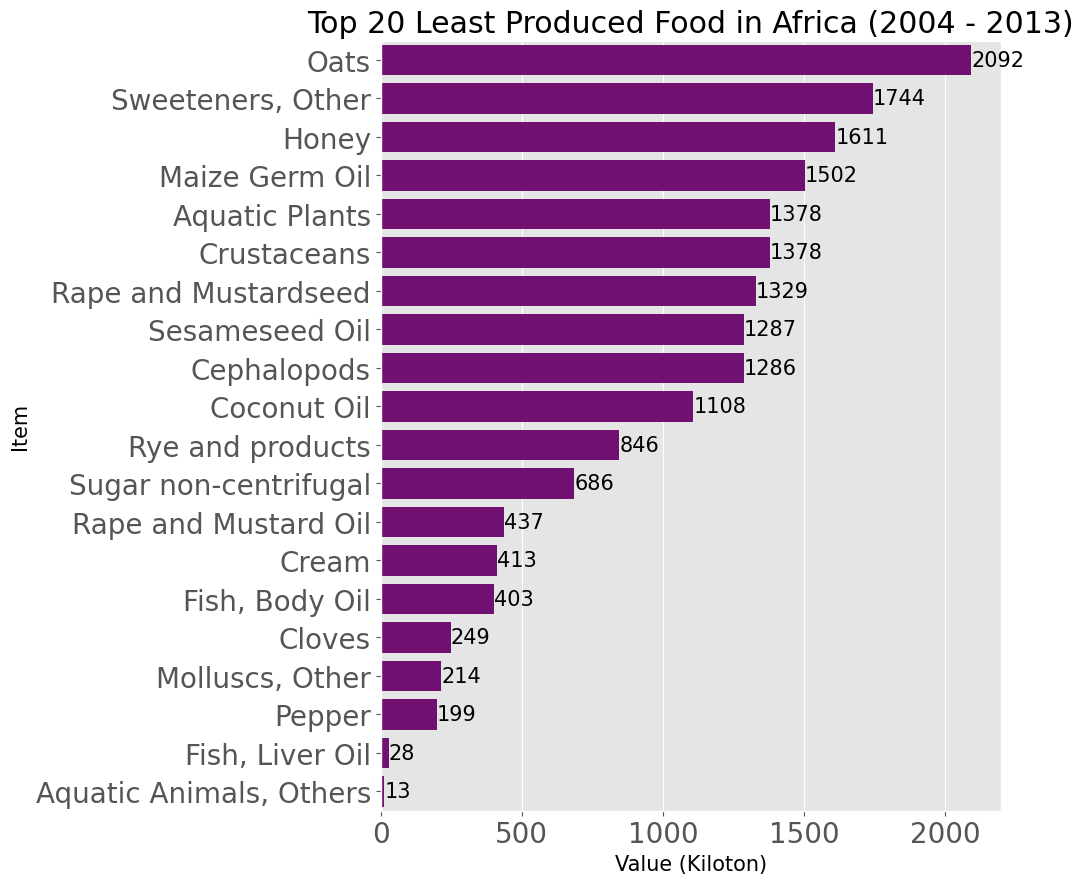

In [25]:
# visualizing the most produced food items with Seaborn(Bar plot)

food_produced=pd.DataFrame(food_production.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()[74:]


plt.rcParams['figure.figsize'] = (8, 10)

ax = sns.barplot(y = food_produced.Item, x = food_produced.Value, data = food_produced, color='purple')

for i in ax.containers:
    ax.bar_label(i)
    
plt.gca().set_title("Top 20 Least Produced Food in Africa (2004 - 2013)")
plt.xlabel('Value (Kiloton)')
plt.ylabel('Item')


plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show();

###
We observed that Rape and Mustard oil, Cream, Fish, Body Oil, Cloves, Molluscs, Pepper, Fish, Liver Oil, Aquatic Animals and others were the least produced food items.

* Nigeria
* Egypt
* South Africa
* Ethiopia
* United Republic of Tanzania

These are the top 5 African Countries that produce food the most. I want to explore more to know which products are they specialized from 2004 to 2013.

### What are the top 20 Food produced by Nigeria from 2004 to 2013

In [26]:
# Filter data for Nigeria
nigeria = food_production[food_production['Country'] == 'Nigeria']
nigeria

Country                Item  Year  Value Unit
15380  Nigeria  Wheat and products  2004     62   kt
15381  Nigeria  Wheat and products  2005     66   kt
15382  Nigeria  Wheat and products  2006     71   kt
15383  Nigeria  Wheat and products  2007     44   kt
15384  Nigeria  Wheat and products  2008     53   kt
...        ...                 ...   ...    ...  ...
15985  Nigeria     Molluscs, Other  2009      3   kt
15986  Nigeria     Molluscs, Other  2010      3   kt
15987  Nigeria     Molluscs, Other  2011      4   kt
15988  Nigeria     Molluscs, Other  2012      4   kt
15989  Nigeria     Molluscs, Other  2013      4   kt

[610 rows x 5 columns]

In [27]:
# Nigeria top produced food from 2004 to 2013
nigeria_products = pd.DataFrame(nigeria.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False))
nigeria_products

Value
Country Item                        
Nigeria Cassava and products  452881
        Yams                  349519
        Beverages, Fermented   93839
        Vegetables, Other      83335
        Sorghum and products   78915
...                              ...
        Sesameseed Oil            35
        Coffee and products       33
        Soyabean Oil              32
        Molluscs, Other           32
        Cephalopods                0

[61 rows x 1 columns]

In [ ]:
# Visualize Nigeria top produced food from 2004 to 2013
nigeria_products = pd.DataFrame(nigeria.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False)).reset_index()[:20]
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= nigeria_products.Value, y= nigeria_products.Item, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Top 20 Most Produced Food in Nigeria (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Item')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

print(f"In Nigeria, the most produced food from 2004 to 2013 was {most_produced_food} with a total production of {total_production_highest} kt.")


Followed by Yam with a total of 349519 kiloton, and Beverages, Fermented food is 93839 kiloton. 

### What are the top 20 Food produced by Egypt from 2004 to 2013

In [29]:
# Filter data for Egypt
egypt = food_production[food_production['Country'] == 'Egypt']
egypt

Country                Item  Year  Value Unit
5660   Egypt  Wheat and products  2004   7178   kt
5661   Egypt  Wheat and products  2005   8141   kt
5662   Egypt  Wheat and products  2006   8274   kt
5663   Egypt  Wheat and products  2007   7379   kt
5664   Egypt  Wheat and products  2008   7977   kt
...      ...                 ...   ...    ...  ...
6355   Egypt      Aquatic Plants  2009      0   kt
6356   Egypt      Aquatic Plants  2010      0   kt
6357   Egypt      Aquatic Plants  2011      0   kt
6358   Egypt      Aquatic Plants  2012      0   kt
6359   Egypt      Aquatic Plants  2013      0   kt

[700 rows x 5 columns]

In [30]:
# Egypt top produced food from 2004 to 2013
egypt_products = pd.DataFrame(egypt.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False))
egypt_products

Value
Country Item                           
Egypt   Sugar cane               160973
        Tomatoes and products     85505
        Vegetables, Other         85271
        Wheat and products        81311
        Maize and products        70993
...                                 ...
        Pigmeat                      13
        Peas                          1
        Aquatic Plants                0
        Aquatic Animals, Others       0
        Fish, Body Oil                0

[70 rows x 1 columns]

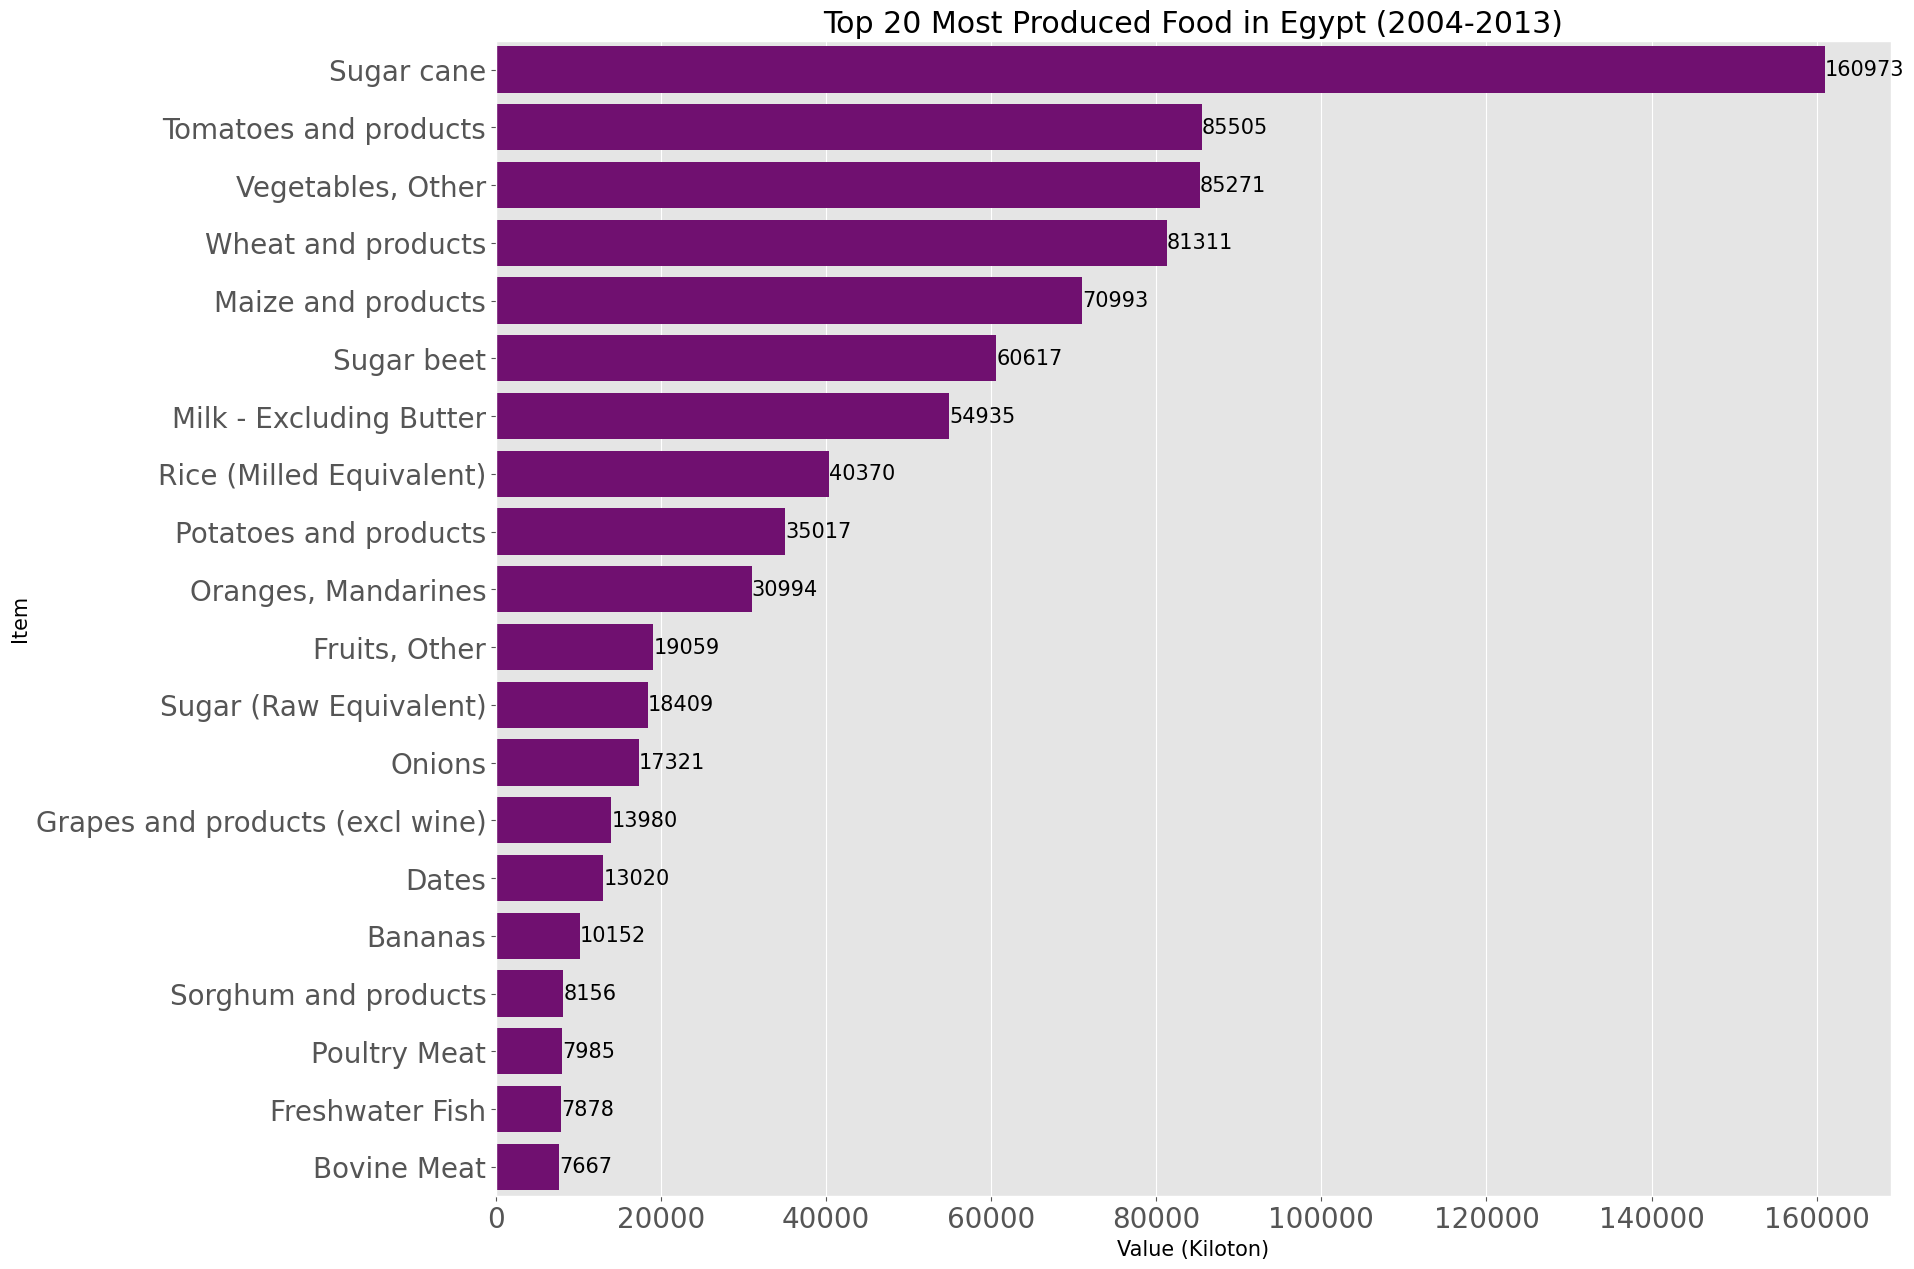

In [31]:
# Visualize Egypt top produced food from 2004 to 2013
egypt_products = pd.DataFrame(egypt.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False)).reset_index()[:20]
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= egypt_products.Value, y= egypt_products.Item, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Top 20 Most Produced Food in Egypt (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Item')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

The most produced food in Egypt according to the chart above is Sugar Cane with a total of 160,973 kiloton, followed by Tomatoes and products with a total of 85,505 kiloton, while Vegetables, Other is 85,271 kiloton.

### What are the top 20 Food produced by South Africa from 2004 to 2013

In [32]:
# Filter data for South Africa
south_africa = food_production[food_production['Country'] == 'South Africa']
south_africa

Country                Item  Year  Value Unit
17760  South Africa  Wheat and products  2004   1687   kt
17761  South Africa  Wheat and products  2005   1905   kt
17762  South Africa  Wheat and products  2006   2105   kt
17763  South Africa  Wheat and products  2007   1905   kt
17764  South Africa  Wheat and products  2008   2130   kt
...             ...                 ...   ...    ...  ...
18505  South Africa      Aquatic Plants  2009     13   kt
18506  South Africa      Aquatic Plants  2010     14   kt
18507  South Africa      Aquatic Plants  2011     14   kt
18508  South Africa      Aquatic Plants  2012     18   kt
18509  South Africa      Aquatic Plants  2013     15   kt

[750 rows x 5 columns]

In [33]:
# South Africa top produced food from 2004 to 2013
south_africa_products = pd.DataFrame(south_africa.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False))
south_africa_products

Value
Country      Item                           
South Africa Sugar cane               188396
             Maize and products       107343
             Milk - Excluding Butter   30965
             Beer                      27127
             Sugar (Raw Equivalent)    22269
...                                      ...
             Honey                        10
             Sesameseed Oil                9
             Coconut Oil                   4
             Fish, Liver Oil               2
             Aquatic Animals, Others       0

[75 rows x 1 columns]

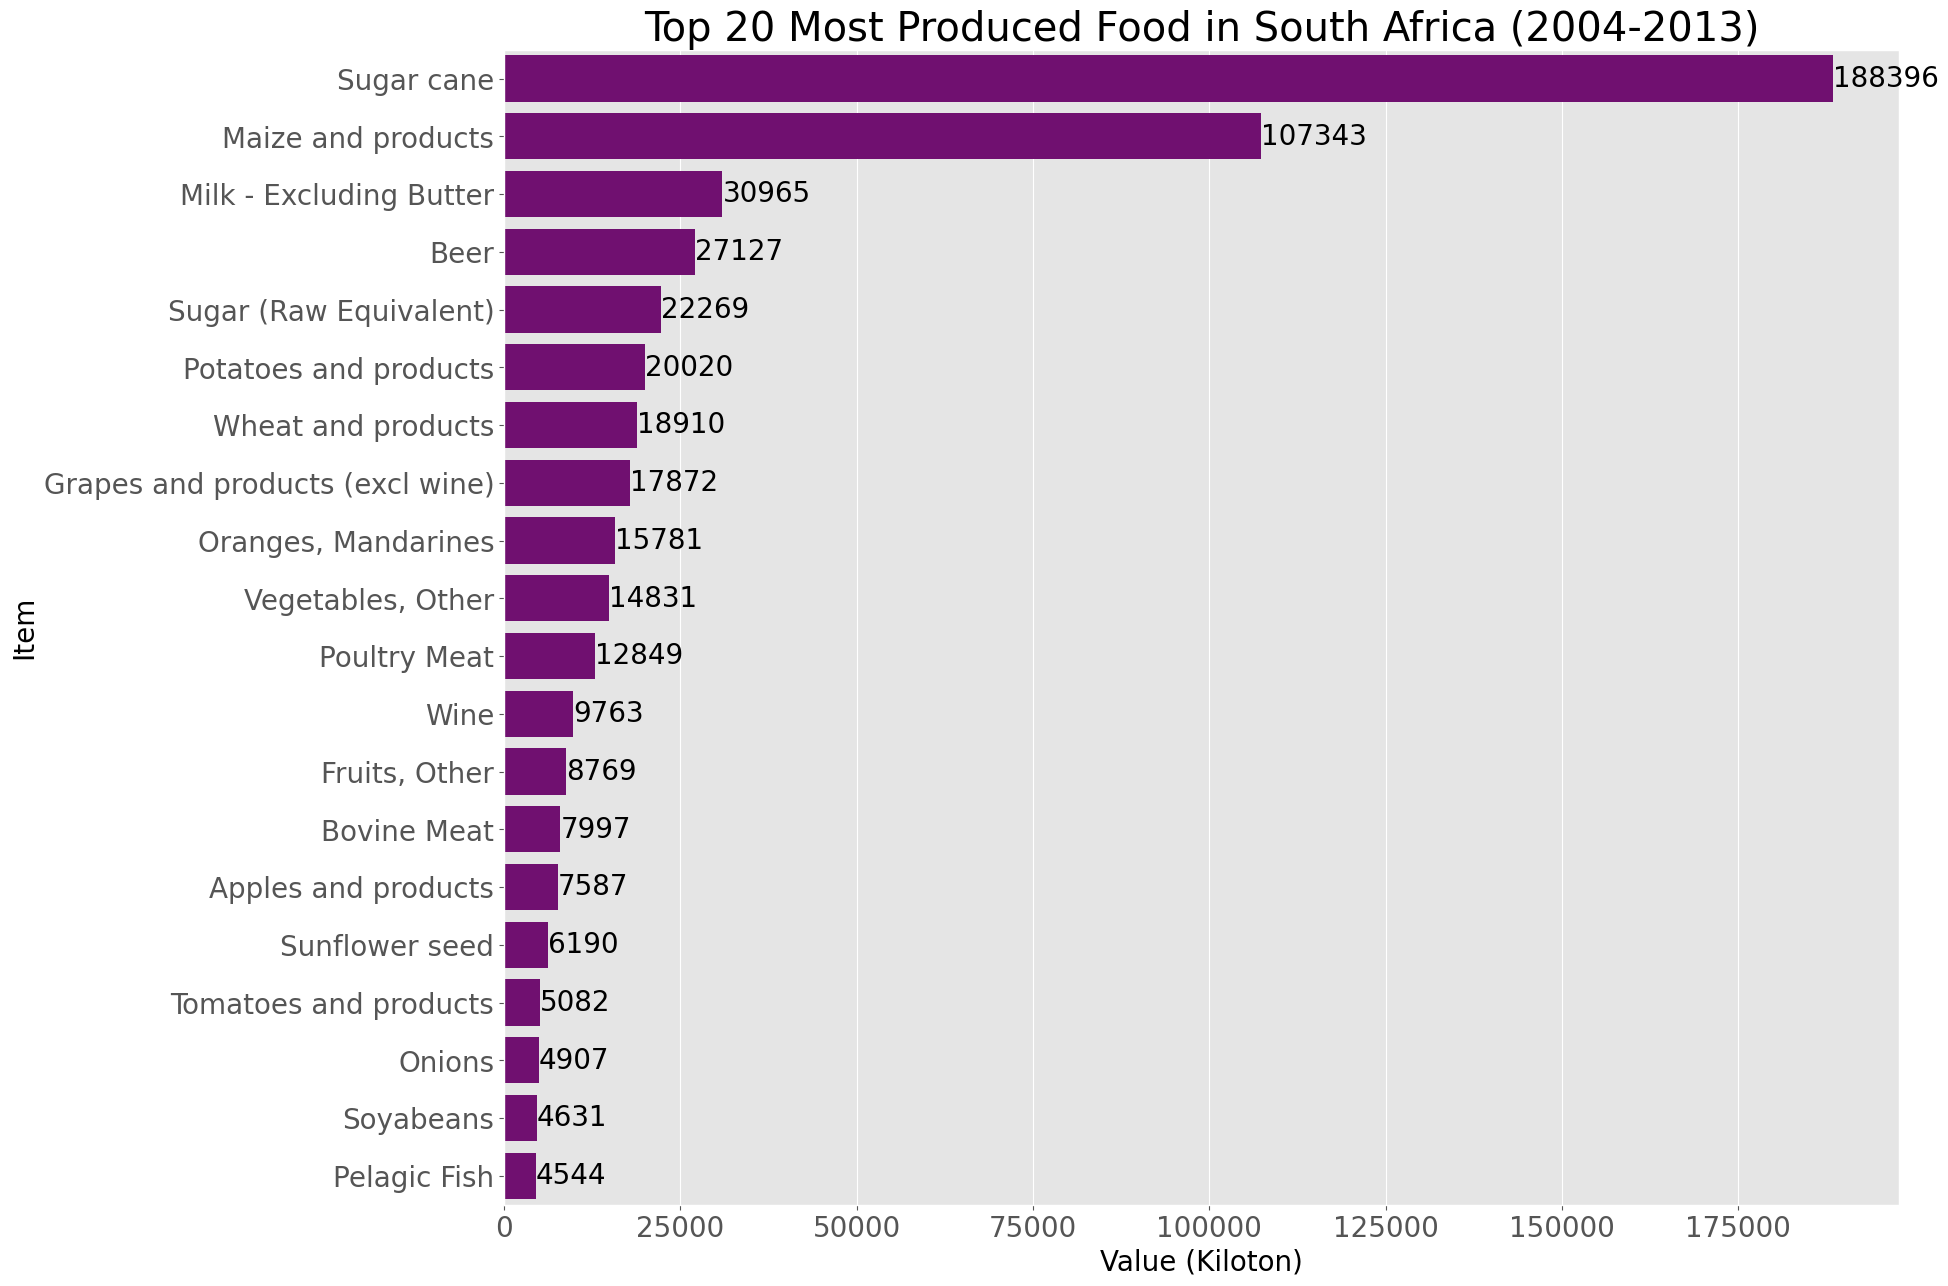

In [34]:
# Visualize South Africa top produced food from 2004 to 2013
south_africa_products = pd.DataFrame(south_africa.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False)).reset_index()[:20]
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= south_africa_products.Value, y= south_africa_products.Item, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Top 20 Most Produced Food in South Africa (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Item')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

Sugarcane is the most produced food in South Africa from 2004 to 2013 with a total of 188,396 kiloton, followed by Maize and products with total 107,343 kiloton, while Milk - Excluding Butter 30965 kiloton.

### What are the top 20 Food produced by Ethiopia from 2004 to 2013

In [35]:
# Filter data for Ethiopia
ethiopia = food_production[food_production['Country'] == 'Ethiopia']
ethiopia

Country                Item  Year  Value Unit
6360  Ethiopia  Wheat and products  2004   1614   kt
6361  Ethiopia  Wheat and products  2005   2177   kt
6362  Ethiopia  Wheat and products  2006   2219   kt
6363  Ethiopia  Wheat and products  2007   2463   kt
6364  Ethiopia  Wheat and products  2008   2314   kt
...        ...                 ...   ...    ...  ...
6955  Ethiopia     Freshwater Fish  2009     17   kt
6956  Ethiopia     Freshwater Fish  2010     18   kt
6957  Ethiopia     Freshwater Fish  2011     24   kt
6958  Ethiopia     Freshwater Fish  2012     24   kt
6959  Ethiopia     Freshwater Fish  2013     24   kt

[600 rows x 5 columns]

In [36]:
# Ethiopia top produced food from 2004 to 2013
ethiopia_products = pd.DataFrame(ethiopia.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False))
ethiopia_products

Value
Country  Item                                  
Ethiopia Roots, Other                     48567
         Maize and products               45745
         Milk - Excluding Butter          33616
         Cereals, Other                   31056
         Sorghum and products             29431
         Wheat and products               27109
         Sugar cane                       25304
         Barley and products              15560
         Vegetables, Other                12702
         Pulses, Other and products       12176
         Sweet potatoes                    6156
         Potatoes and products             5472
         Millet and products               5471
         Yams                              4479
         Beer                              3951
         Beverages, Fermented              3839
         Bovine Meat                       3667
         Fruits, Other                     3371
         Sugar (Raw Equivalent)            3334
         Oilcrops, Other                   2992
         Beans                             2688
         Coffee and products               2661
         Peas                              2538
         Bananas                           2450
         Onions                            2149
         Sesame seed                       1863
         Mutton & Goat Meat                1426
         Offals, Edible                    1219
         Meat, Other                       1049
         Pimento                           1038
         Oilcrops Oil, Other                792
         Nuts and products                  639
         Poultry Meat                       515
         Oranges, Mandarines                494
         Tomatoes and products              470
         Rice (Milled Equivalent)           469
         Oats                               443
         Groundnuts (Shelled Eq)            439
         Honey                              439
         Cottonseed                         437
         Rape and Mustardseed               424
         Eggs                               386
         Spices, Other                      334
         Fats, Animals, Raw                 212
         Soyabeans                          192
         Butter, Ghee                       180
         Freshwater Fish                    166
         Rape and Mustard Oil               116
         Beverages, Alcoholic                76
         Grapes and products (excl wine)     63
         Tea (including mate)                57
         Lemons, Limes and products          54
         Cottonseed Oil                      40
         Pineapples and products             35
         Citrus, Other                       33
         Sweeteners, Other                   29
         Groundnut Oil                       21
         Pigmeat                             20
         Pepper                              20
         Wine                                19

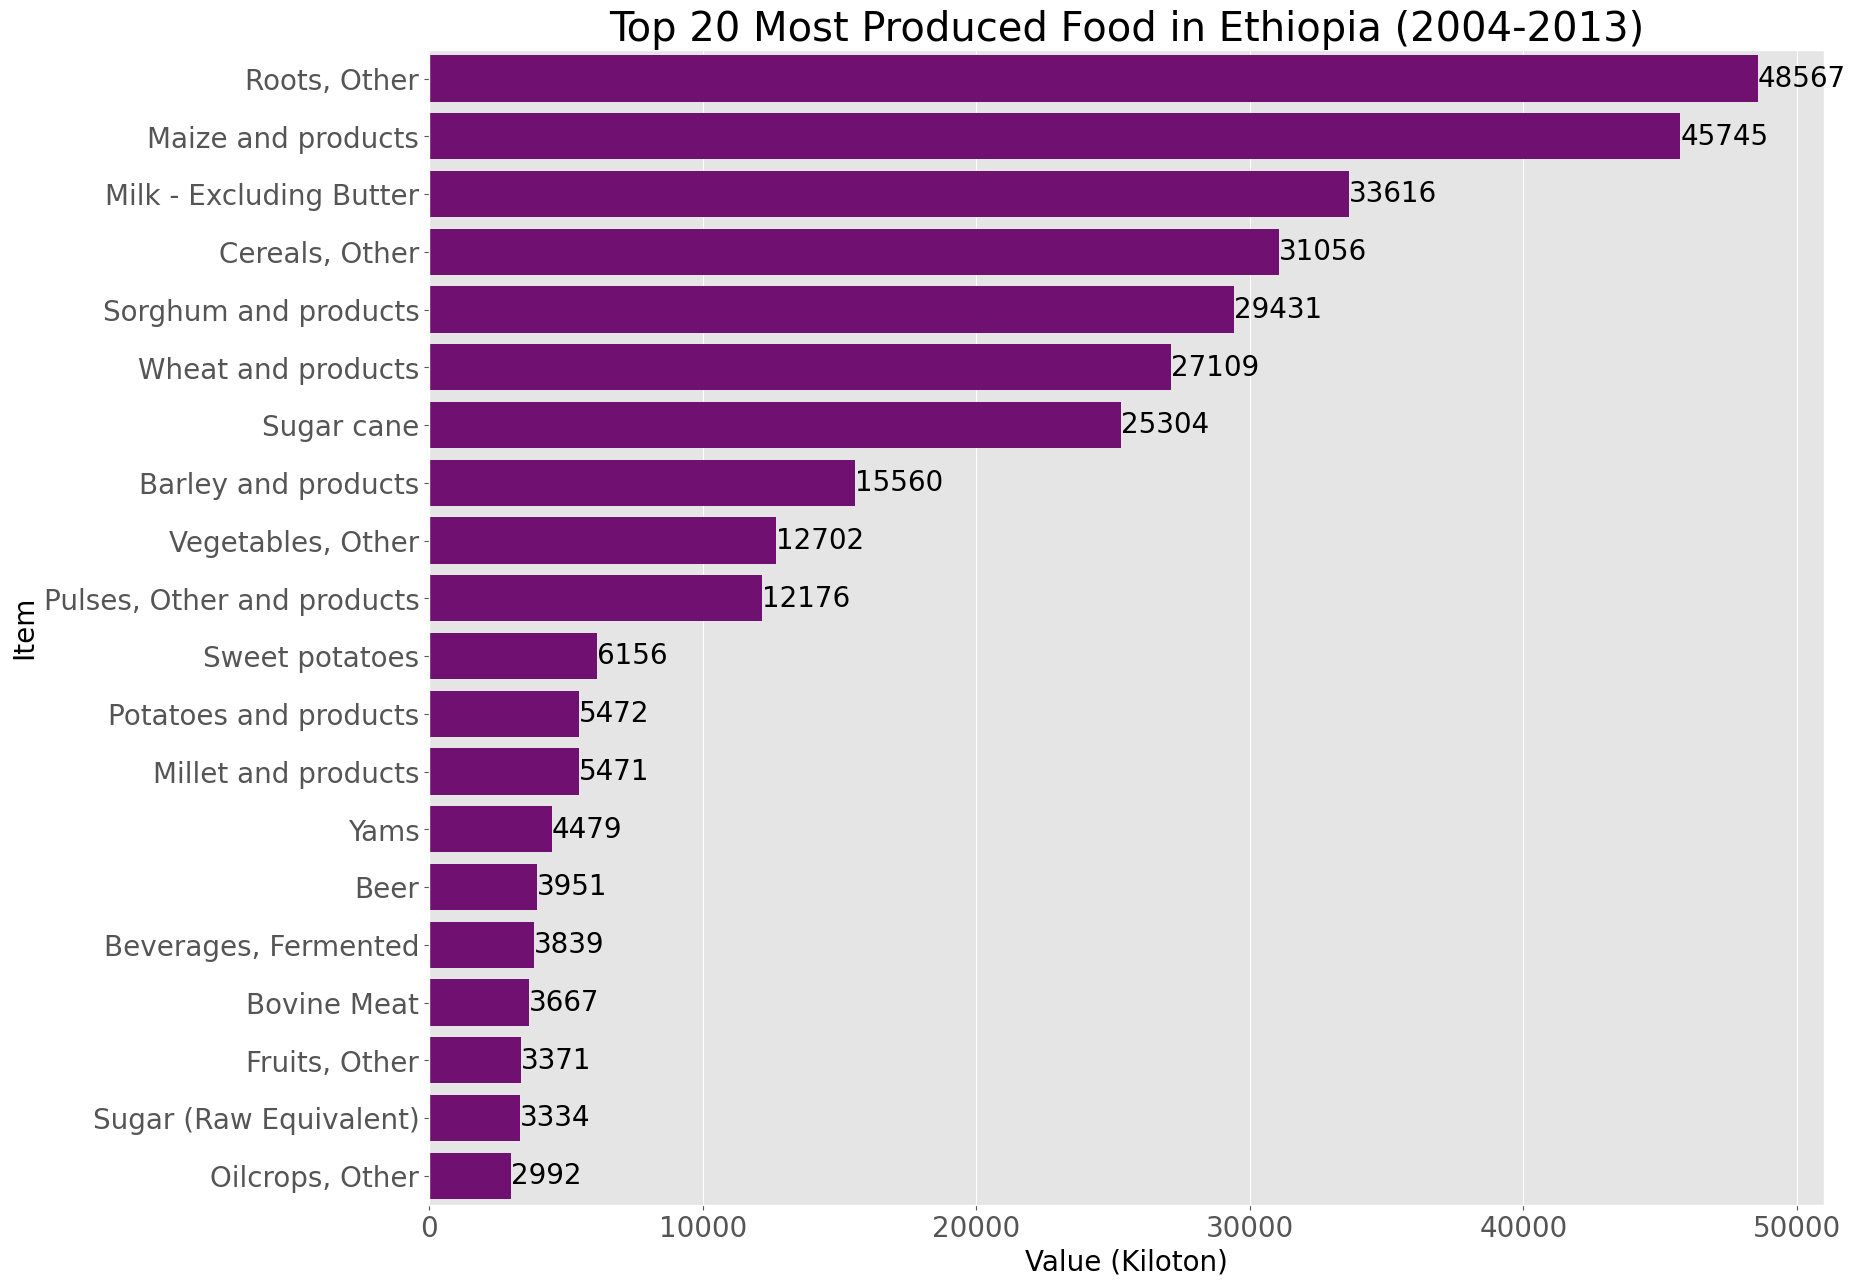

In [37]:
# Visualize Ethiopia top produced food from 2004 to 2013
ethiopia_products = pd.DataFrame(ethiopia.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False)).reset_index()[:20]
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= ethiopia_products.Value, y= ethiopia_products.Item, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Top 20 Most Produced Food in Ethiopia (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Item')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

In Ethiopia, Roots, Other is the most produced food with a total of 48,567 kiloton, followed by Maize and Products with a total of 45,745 kiloton while Milk - Excluding Butter is 33,616 kiloton.

### What are the top 20 Food produced by United Republic of Tanzania from 2004 to 2013

In [38]:
# Filter data for United Republic of Tanzania
ur_tanzania = food_production[food_production['Country'] == 'United Republic of Tanzania']
ur_tanzania

Country                Item  Year  Value Unit
21200  United Republic of Tanzania  Wheat and products  2004     67   kt
21201  United Republic of Tanzania  Wheat and products  2005    102   kt
21202  United Republic of Tanzania  Wheat and products  2006    110   kt
21203  United Republic of Tanzania  Wheat and products  2007     83   kt
21204  United Republic of Tanzania  Wheat and products  2008     43   kt
...                            ...                 ...   ...    ...  ...
21985  United Republic of Tanzania      Aquatic Plants  2009    108   kt
21986  United Republic of Tanzania      Aquatic Plants  2010    132   kt
21987  United Republic of Tanzania      Aquatic Plants  2011    138   kt
21988  United Republic of Tanzania      Aquatic Plants  2012    138   kt
21989  United Republic of Tanzania      Aquatic Plants  2013    138   kt

[790 rows x 5 columns]

In [39]:
# United Republic of Tanzania top produced food from 2004 to 2013
ur_tanzania_products = pd.DataFrame(ur_tanzania.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False))
ur_tanzania_products

Value
Country                     Item                          
United Republic of Tanzania Cassava and products     52057
                            Maize and products       43166
                            Bananas                  28043
                            Sugar cane               26150
                            Beverages, Fermented     25285
...                                                    ...
                            Molluscs, Other             10
                            Fish, Body Oil               1
                            Pepper                       1
                            Fish, Liver Oil              0
                            Aquatic Animals, Others      0

[79 rows x 1 columns]

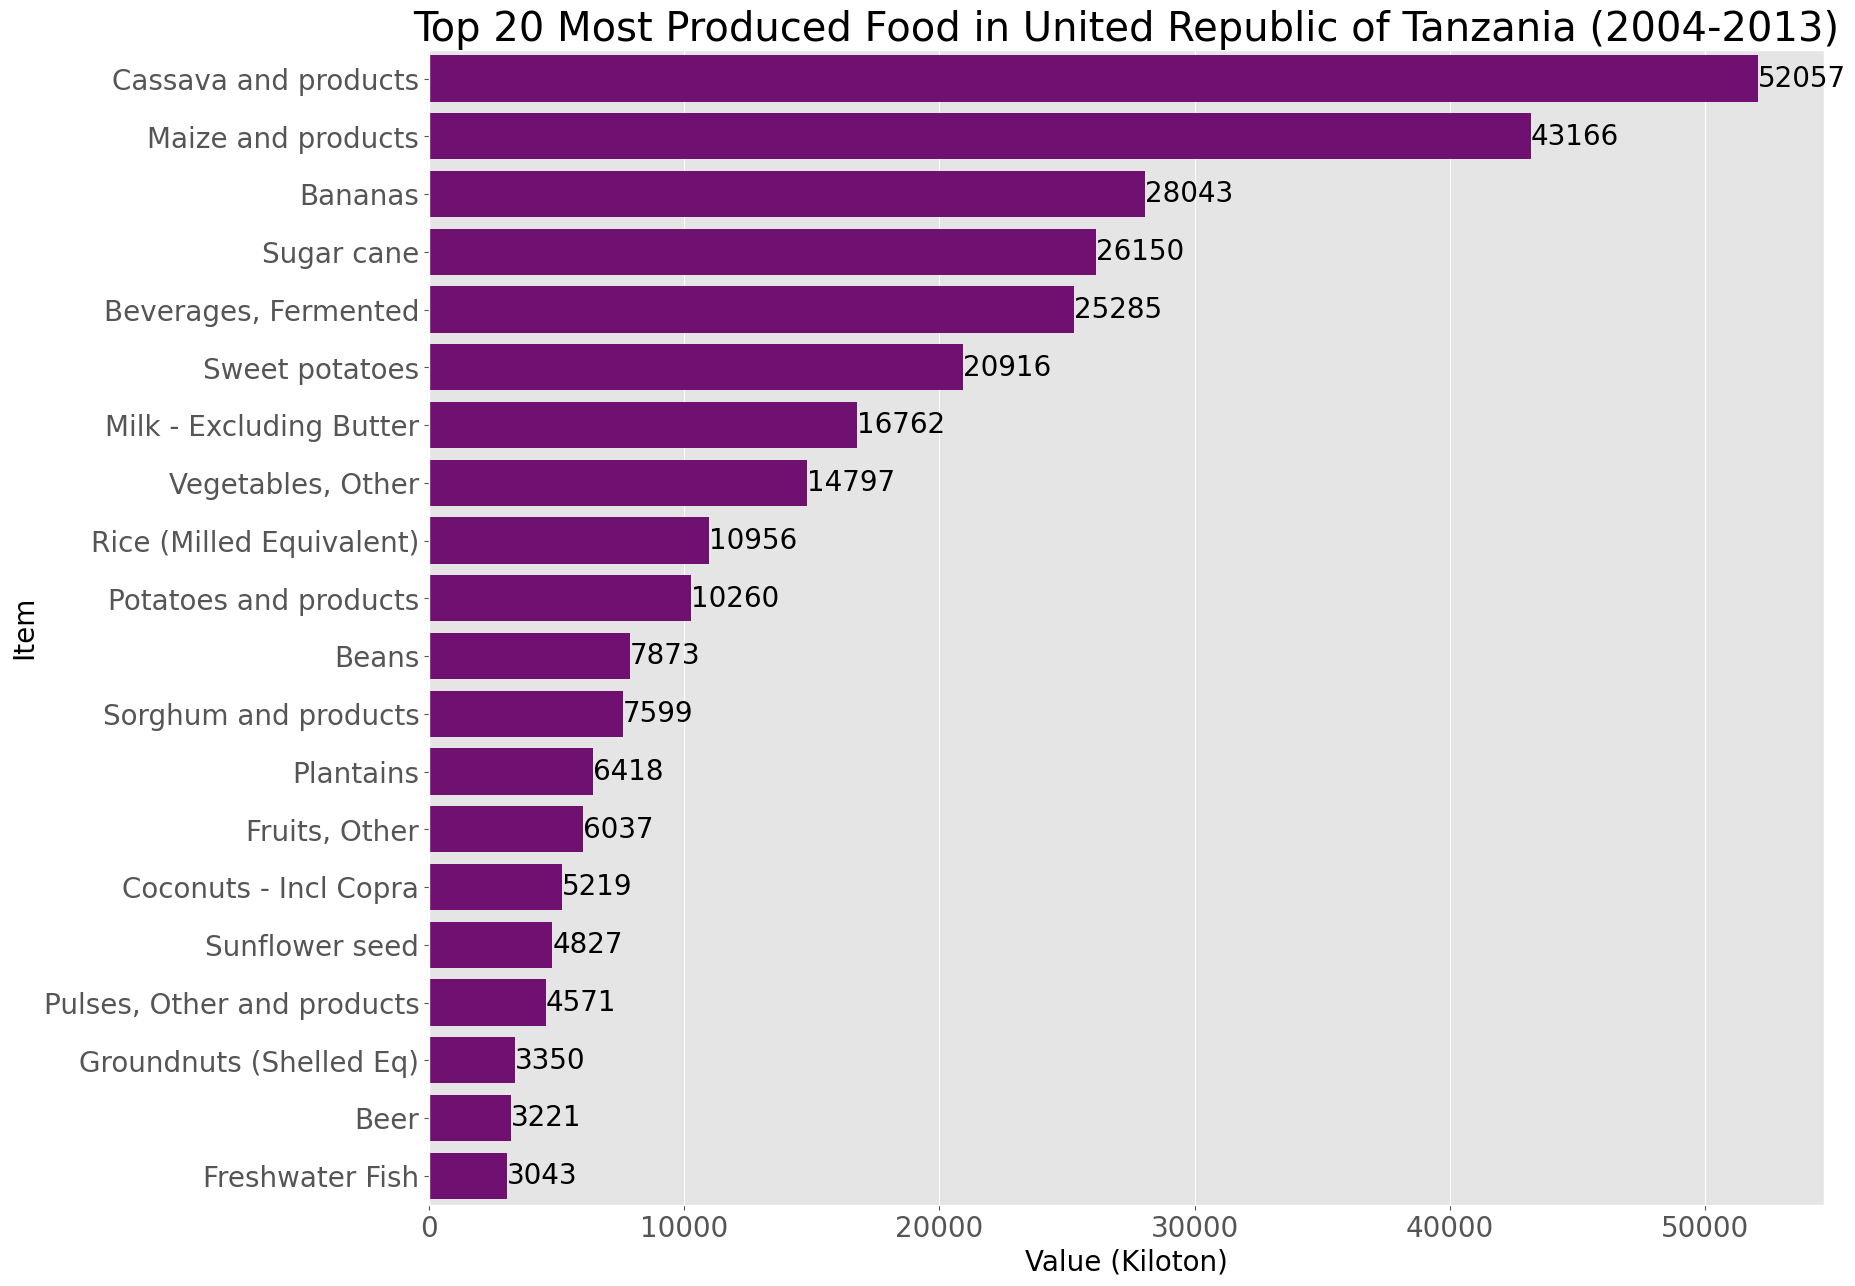

In [40]:
# Visualize United Republic of Tanzania top produced food from 2004 to 2013
ur_tanzania_products = pd.DataFrame(ur_tanzania.groupby(['Country', "Item"])['Value'].sum().sort_values(ascending=False)).reset_index()[:20]
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= ur_tanzania_products.Value, y= ur_tanzania_products.Item, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Top 20 Most Produced Food in United Republic of Tanzania (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Item')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

* Cassava and Products is the most produced food in United Republic of Tanzania from 2004 to 2013 with a total 52,057 kiloton, seconded by Maize and Products with a total of 43,166 kiloton and then Bananas with a total of 28,043 kiloton.

* Cassava and Products is also the most produced food in Nigeria.

### Who are the Top Rice, Cassava, Wheat, Maize and products producing countries?

#### Top Rice producing countries

In [41]:
# Filtering the Rice production data
rice_producing_countries = food_production[food_production.Item == 'Rice (Milled Equivalent)']
rice_producing_countries

Country                      Item  Year  Value Unit
10      Algeria  Rice (Milled Equivalent)  2004      0   kt
11      Algeria  Rice (Milled Equivalent)  2005      0   kt
12      Algeria  Rice (Milled Equivalent)  2006      0   kt
13      Algeria  Rice (Milled Equivalent)  2007      0   kt
14      Algeria  Rice (Milled Equivalent)  2008      0   kt
...         ...                       ...   ...    ...  ...
22485  Zimbabwe  Rice (Milled Equivalent)  2009      0   kt
22486  Zimbabwe  Rice (Milled Equivalent)  2010      0   kt
22487  Zimbabwe  Rice (Milled Equivalent)  2011      0   kt
22488  Zimbabwe  Rice (Milled Equivalent)  2012      0   kt
22489  Zimbabwe  Rice (Milled Equivalent)  2013      0   kt

[380 rows x 5 columns]

In [42]:
top_rice_countries = pd.DataFrame(rice_producing_countries.groupby(['Country'])['Value'].sum().sort_values(ascending=False))
top_rice_countries

Value
Country                           
Egypt                        40370
Nigeria                      26964
Madagascar                   26118
United Republic of Tanzania  10956
Guinea                       10400
Mali                         10371
Cote d'Ivoire                 6439
Sierra Leone                  6038
Senegal                       2462
Ghana                         2443
Liberia                       1602
Burkina Faso                  1265
Uganda                        1234
Chad                          1167
Mozambique                    1110
Guinea-Bissau                 1030
Benin                          850
Cameroon                       767
Mauritania                     751
Malawi                         674
Togo                           653
Kenya                          504
Rwanda                         482
Ethiopia                       469
Gambia                         325
Morocco                        274
Niger                          267
Central African Republic       261
Zambia                         212
Sudan                          170
Angola                         103
South Africa                    22
Gabon                           10
Congo                           10
Zimbabwe                         1
Mauritius                        1
Swaziland                        0
Algeria                          0

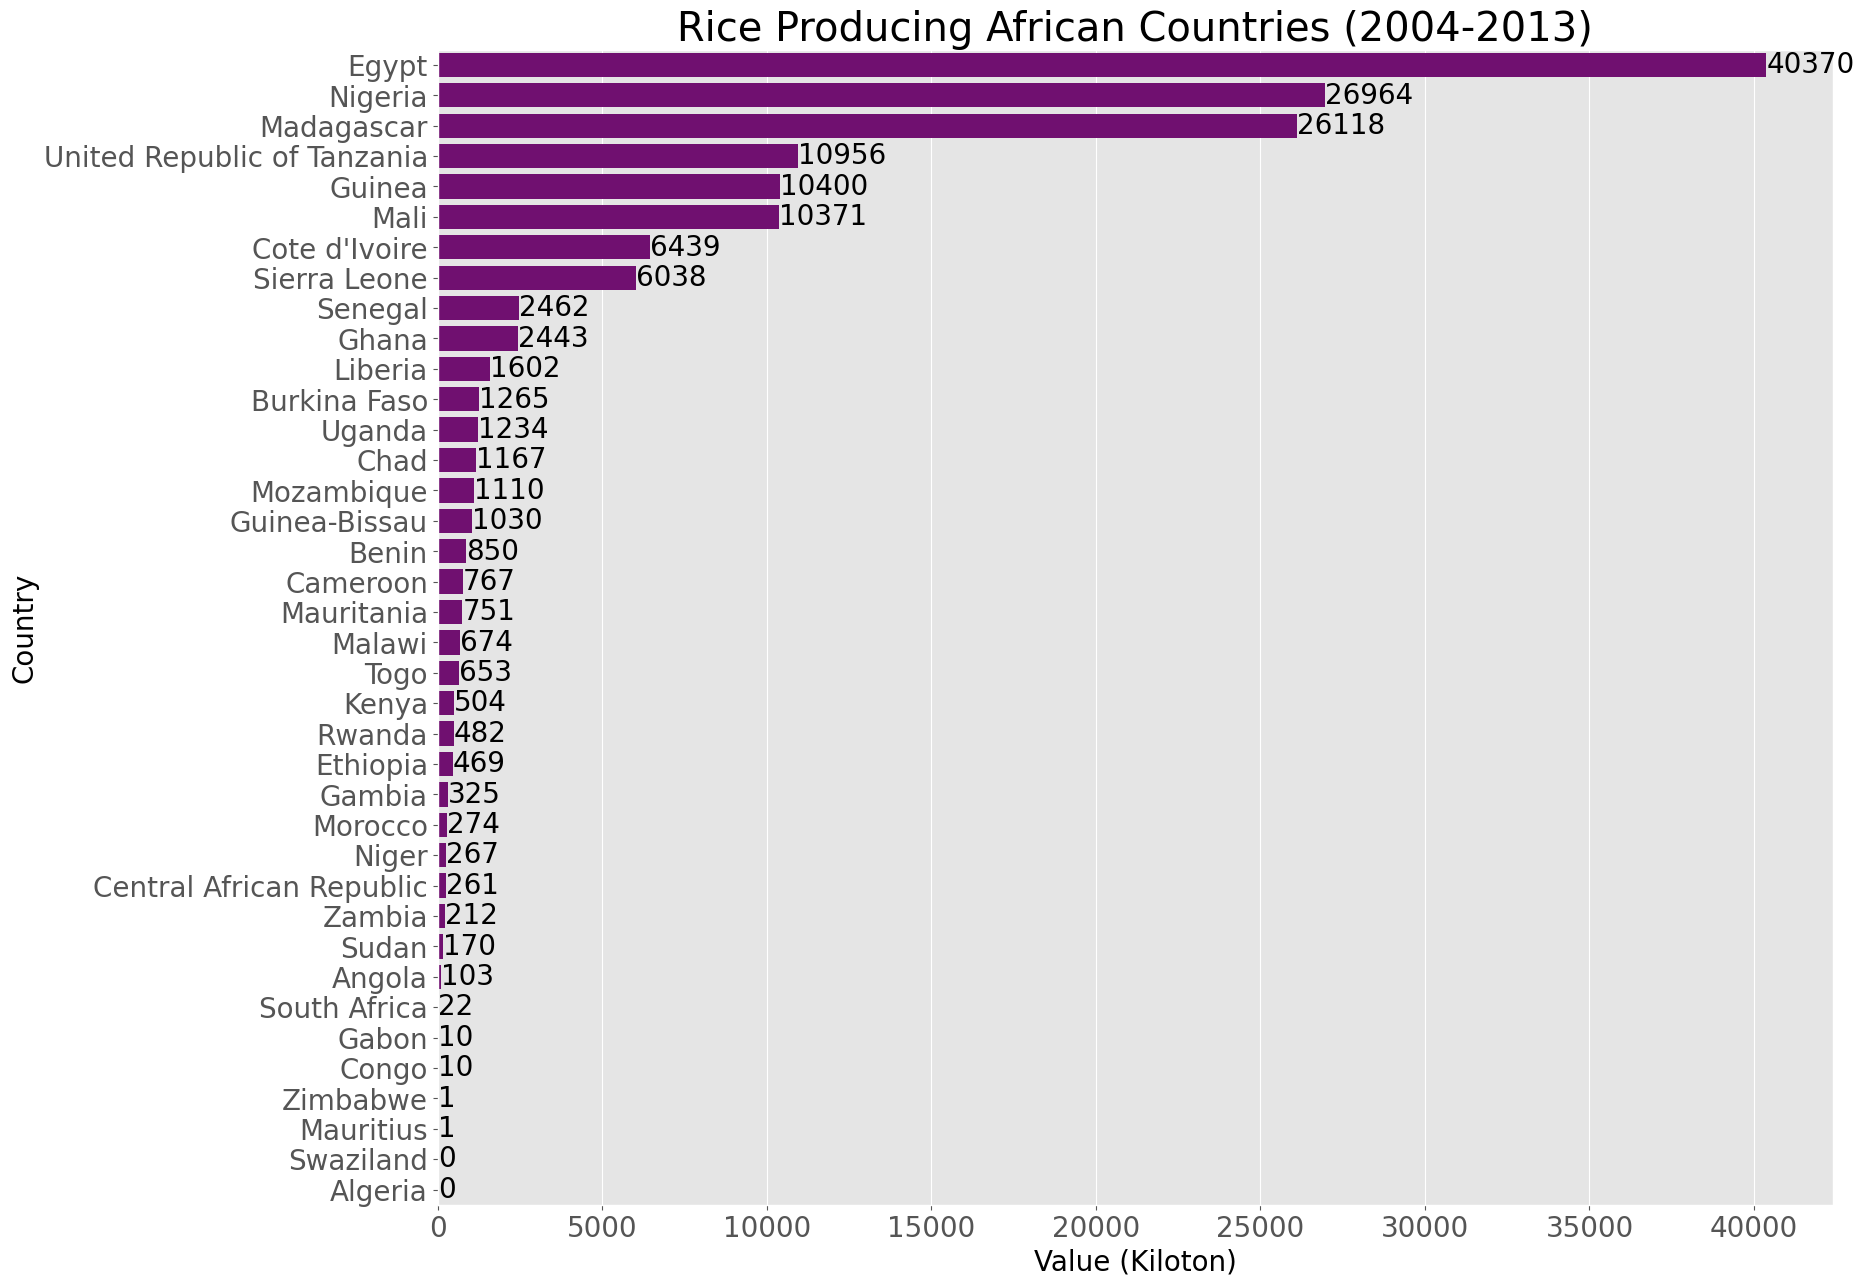

In [43]:
# Chart to display top rice produing countries

top_rice_countries = pd.DataFrame(rice_producing_countries.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= top_rice_countries.Value, y= top_rice_countries.Country, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Rice Producing African Countries (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Country')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

* From the chart above we can see that Egypt is the top rice producing country with a total of 40,370 kiloton followed by Nigeria with a total of 26,064 kiloton and then Madagascar with 26,118 kiloton.

* It also shows that Zimbabwe and Mauritius are the least rice producing country with 1 kiloton each while Swaziland and Algeria has 0 kiloton.

#### Top Cassava Producing Countries

In [44]:
# Filtering the Cassava production data
cassava_producing_countries = food_production[food_production.Item == 'Cassava and products']
cassava_producing_countries

Country                  Item  Year  Value Unit
630      Angola  Cassava and products  2004   8587   kt
631      Angola  Cassava and products  2005   8806   kt
632      Angola  Cassava and products  2006   9037   kt
633      Angola  Cassava and products  2007   9730   kt
634      Angola  Cassava and products  2008  10057   kt
...         ...                   ...   ...    ...  ...
22555  Zimbabwe  Cassava and products  2009    216   kt
22556  Zimbabwe  Cassava and products  2010    204   kt
22557  Zimbabwe  Cassava and products  2011    225   kt
22558  Zimbabwe  Cassava and products  2012    228   kt
22559  Zimbabwe  Cassava and products  2013    230   kt

[330 rows x 5 columns]

In [45]:
top_cassava_countries = pd.DataFrame(cassava_producing_countries.groupby(['Country'])['Value'].sum().sort_values(ascending=False))
top_cassava_countries

Value
Country                            
Nigeria                      452881
Ghana                        121026
Angola                       114286
Mozambique                    71243
United Republic of Tanzania   52057
Uganda                        38317
Malawi                        35881
Cameroon                      32904
Benin                         32458
Madagascar                    30165
Sierra Leone                  25193
Cote d'Ivoire                 23188
Rwanda                        17414
Congo                         11327
Zambia                        10851
Guinea                        10839
Togo                           8355
Kenya                          6624
Central African Republic       6228
Liberia                        5105
Senegal                        2969
Chad                           2500
Gabon                          2450
Zimbabwe                       2112
Niger                          1202
Mali                            575
Guinea-Bissau                   458
Sudan                           125
Gambia                           92
Cabo Verde                       46
Burkina Faso                     41
Sao Tome and Principe            33
Mauritius                         3

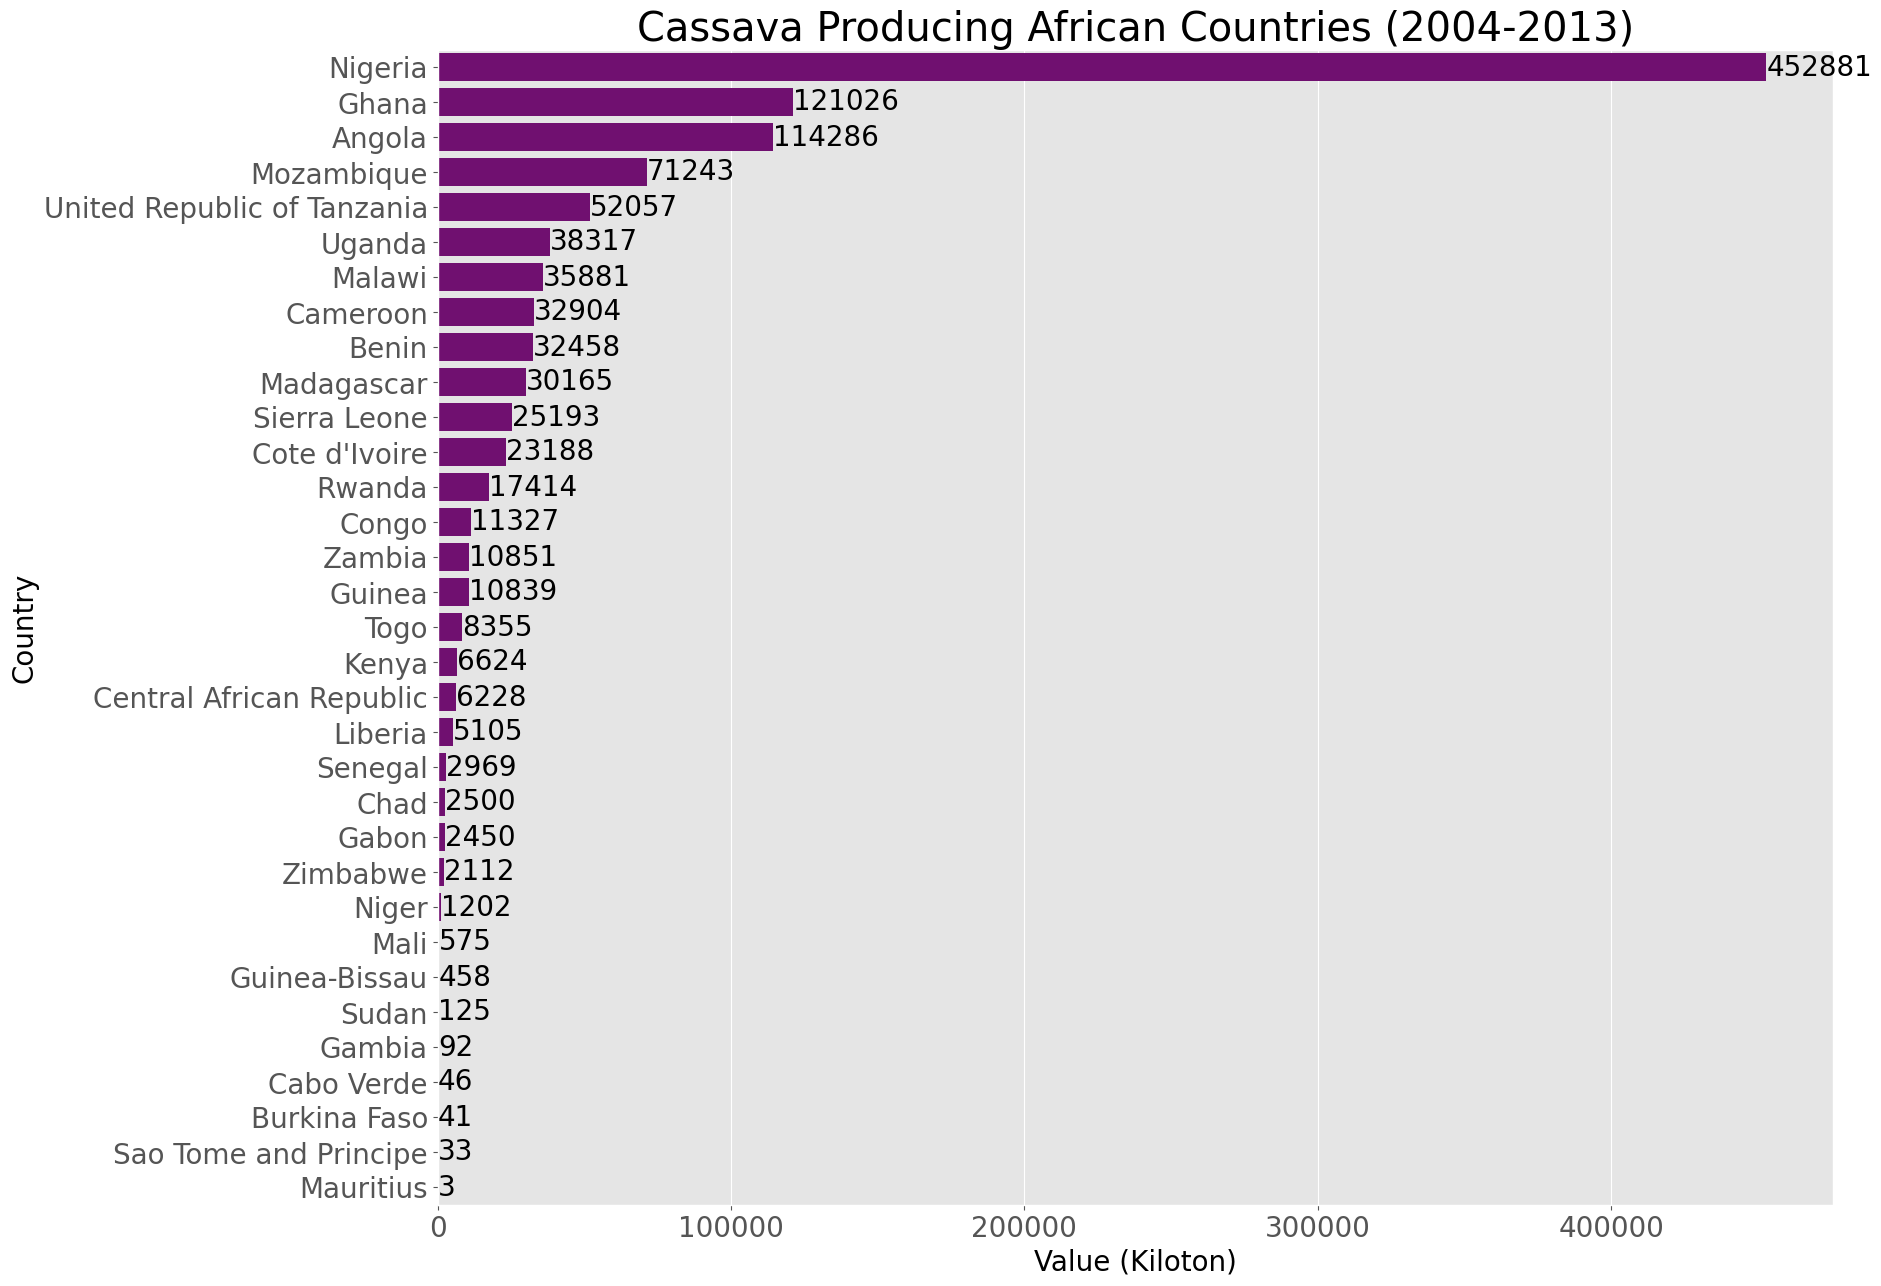

In [46]:
# Chart to display top cassava produing countries

top_cassava_countries = pd.DataFrame(cassava_producing_countries.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= top_cassava_countries.Value, y= top_cassava_countries.Country, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Cassava Producing African Countries (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Country')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

Nigeria is the top cassava producing country with a total of 452,881 kiloton followed by Ghana with a total cassava production of 121,026 kiloton and Angola with 114,286 kiloton.

The margin difference between the cassava production value of Nigeria and other countries is quite large.

#### Top Wheat producing countries

In [47]:
# Filtering the Wheat production data
wheat_producing_countries = food_production[food_production.Item == 'Wheat and products']
wheat_producing_countries

Country                Item  Year  Value Unit
0       Algeria  Wheat and products  2004   2731   kt
1       Algeria  Wheat and products  2005   2415   kt
2       Algeria  Wheat and products  2006   2688   kt
3       Algeria  Wheat and products  2007   2319   kt
4       Algeria  Wheat and products  2008   1111   kt
...         ...                 ...   ...    ...  ...
22475  Zimbabwe  Wheat and products  2009     12   kt
22476  Zimbabwe  Wheat and products  2010     18   kt
22477  Zimbabwe  Wheat and products  2011     23   kt
22478  Zimbabwe  Wheat and products  2012     20   kt
22479  Zimbabwe  Wheat and products  2013     25   kt

[270 rows x 5 columns]

In [48]:
top_wheat_countries = pd.DataFrame(wheat_producing_countries.groupby(['Country'])['Value'].sum().sort_values(ascending=False))
top_wheat_countries

Value
Country                           
Egypt                        81311
Morocco                      48339
Ethiopia                     27109
Algeria                      26108
South Africa                 18910
Tunisia                      13542
Sudan                         4836
Kenya                         3663
Zambia                        1675
Zimbabwe                       996
United Republic of Tanzania    875
Nigeria                        831
Rwanda                         538
Uganda                         189
Mali                           185
Mozambique                     136
Namibia                        130
Lesotho                        115
Madagascar                     104
Chad                           100
Niger                           76
Angola                          40
Mauritania                      30
Malawi                          24
Cameroon                        10
Swaziland                        3
Botswana                         0

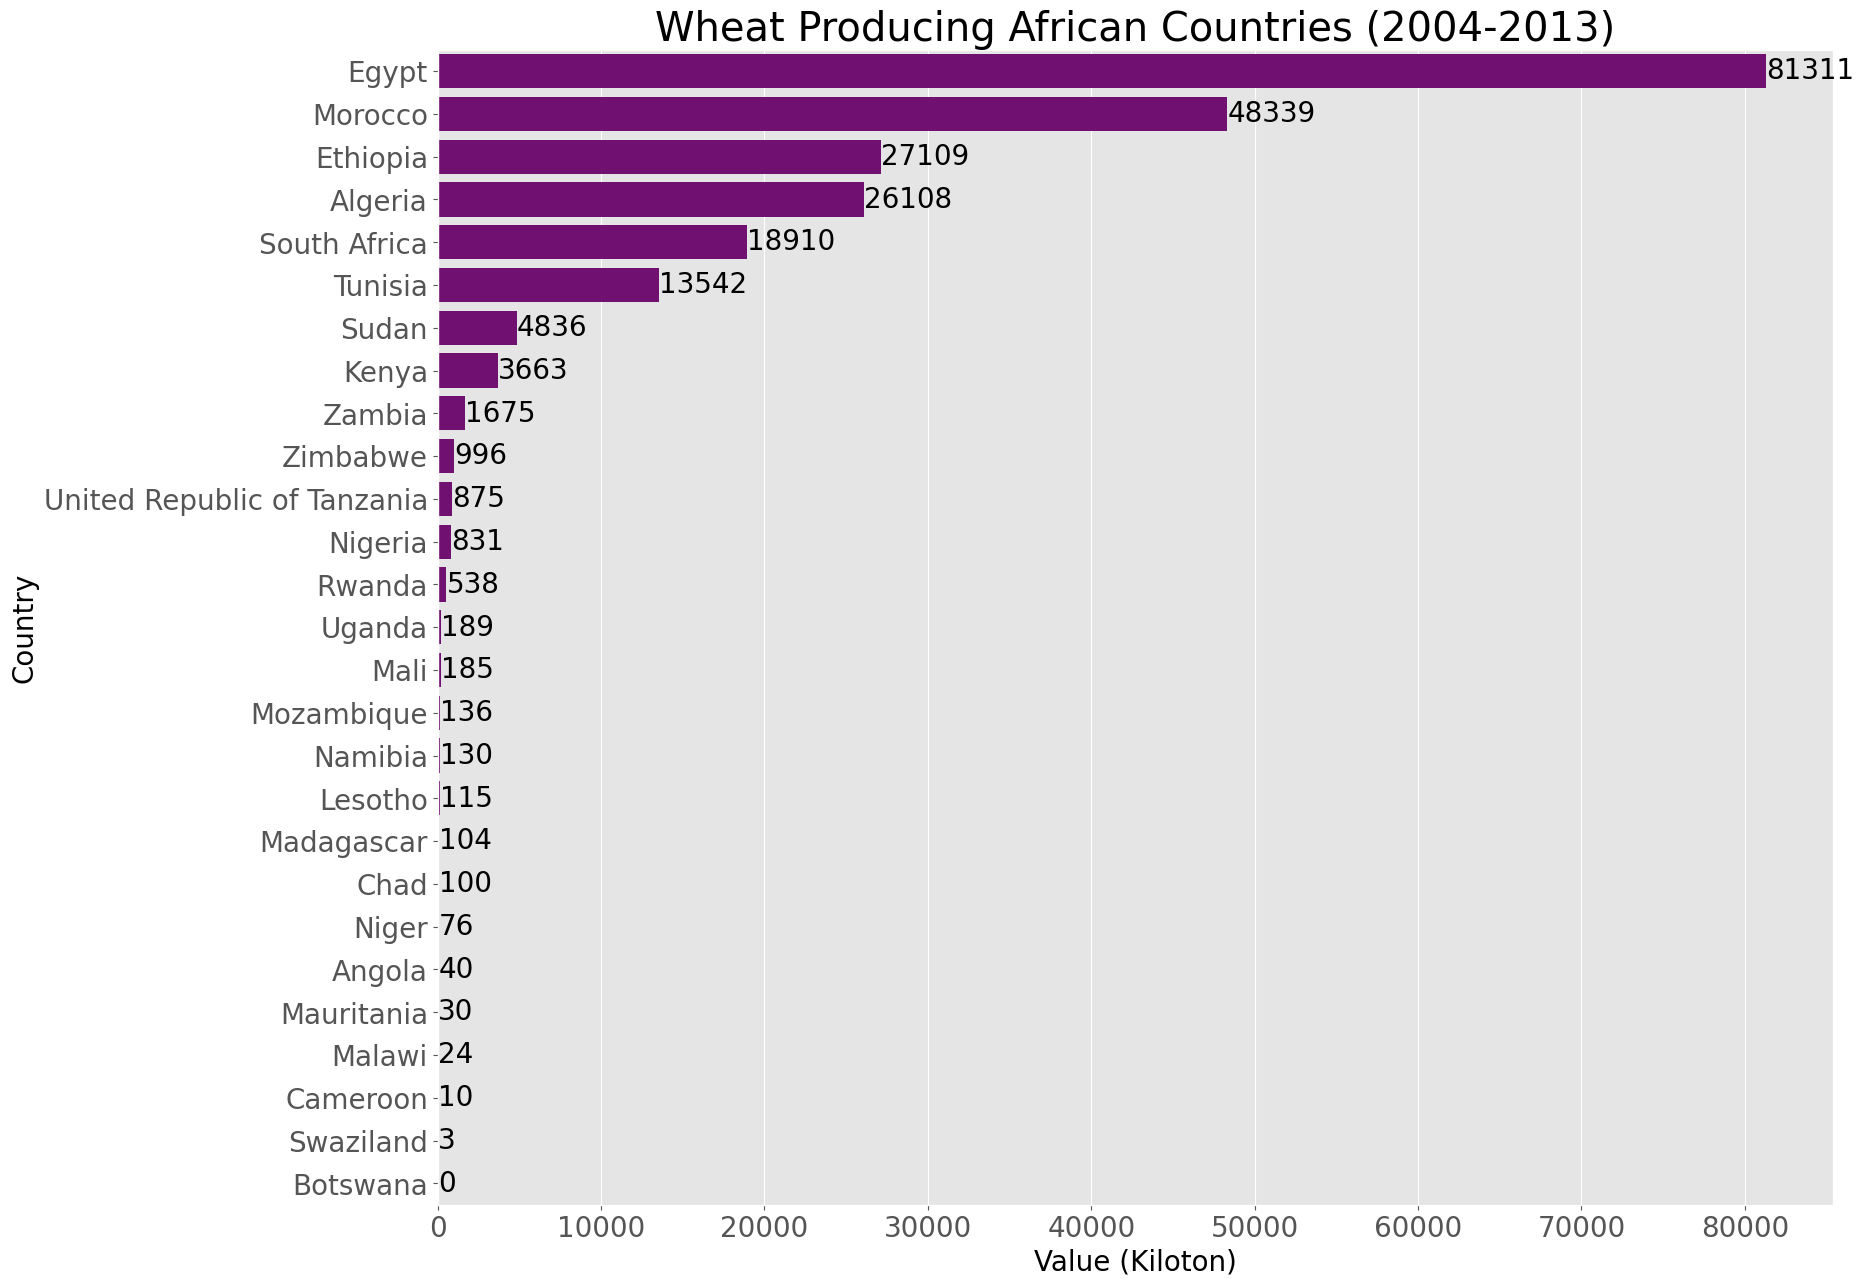

In [49]:
# Chart to display top wheat produing countries

top_wheat_countries = pd.DataFrame(wheat_producing_countries.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= top_wheat_countries.Value, y= top_wheat_countries.Country, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Wheat Producing African Countries (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Country')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

From the the chart above, it shows that Egypt is the top wheat producing country with a total of 81,311 kiloton, followed by Morocco with 48,339 kiloton and Ethiopia with a total of 27,109 kiloton.

#### Top Maize producing countries

In [50]:
# Filtering the Maize production data
maize_producing_countries = food_production[food_production.Item == 'Maize and products']
maize_producing_countries

Country                Item  Year  Value Unit
30      Algeria  Maize and products  2004      1   kt
31      Algeria  Maize and products  2005      1   kt
32      Algeria  Maize and products  2006      2   kt
33      Algeria  Maize and products  2007      2   kt
34      Algeria  Maize and products  2008      1   kt
...         ...                 ...   ...    ...  ...
22505  Zimbabwe  Maize and products  2009    700   kt
22506  Zimbabwe  Maize and products  2010   1192   kt
22507  Zimbabwe  Maize and products  2011   1452   kt
22508  Zimbabwe  Maize and products  2012    968   kt
22509  Zimbabwe  Maize and products  2013    799   kt

[430 rows x 5 columns]

In [51]:
top_maize_countries = pd.DataFrame(maize_producing_countries.groupby(['Country'])['Value'].sum().sort_values(ascending=False))
top_maize_countries

Value
Country                            
South Africa                 107343
Nigeria                       76898
Egypt                         70993
Ethiopia                      45745
United Republic of Tanzania   43166
Kenya                         30328
Malawi                        29265
Uganda                        19914
Zambia                        19170
Mozambique                    15367
Ghana                         15098
Cameroon                      14246
Zimbabwe                      10646
Mali                          10581
Benin                          9992
Burkina Faso                   9961
Angola                         8463
Cote d'Ivoire                  6278
Togo                           6172
Guinea                         5702
Madagascar                     4087
Rwanda                         3037
Senegal                        2642
Chad                           2253
Morocco                        1700
Central African Republic       1442
Lesotho                         767
Swaziland                       714
Namibia                         548
Sudan                           548
Gabon                           380
Sierra Leone                    379
Gambia                          370
Guinea-Bissau                   196
Mauritania                      139
Botswana                        128
Congo                           107
Niger                            82
Cabo Verde                       65
Sao Tome and Principe            22
Algeria                          12
Mauritius                         2
Djibouti                          0

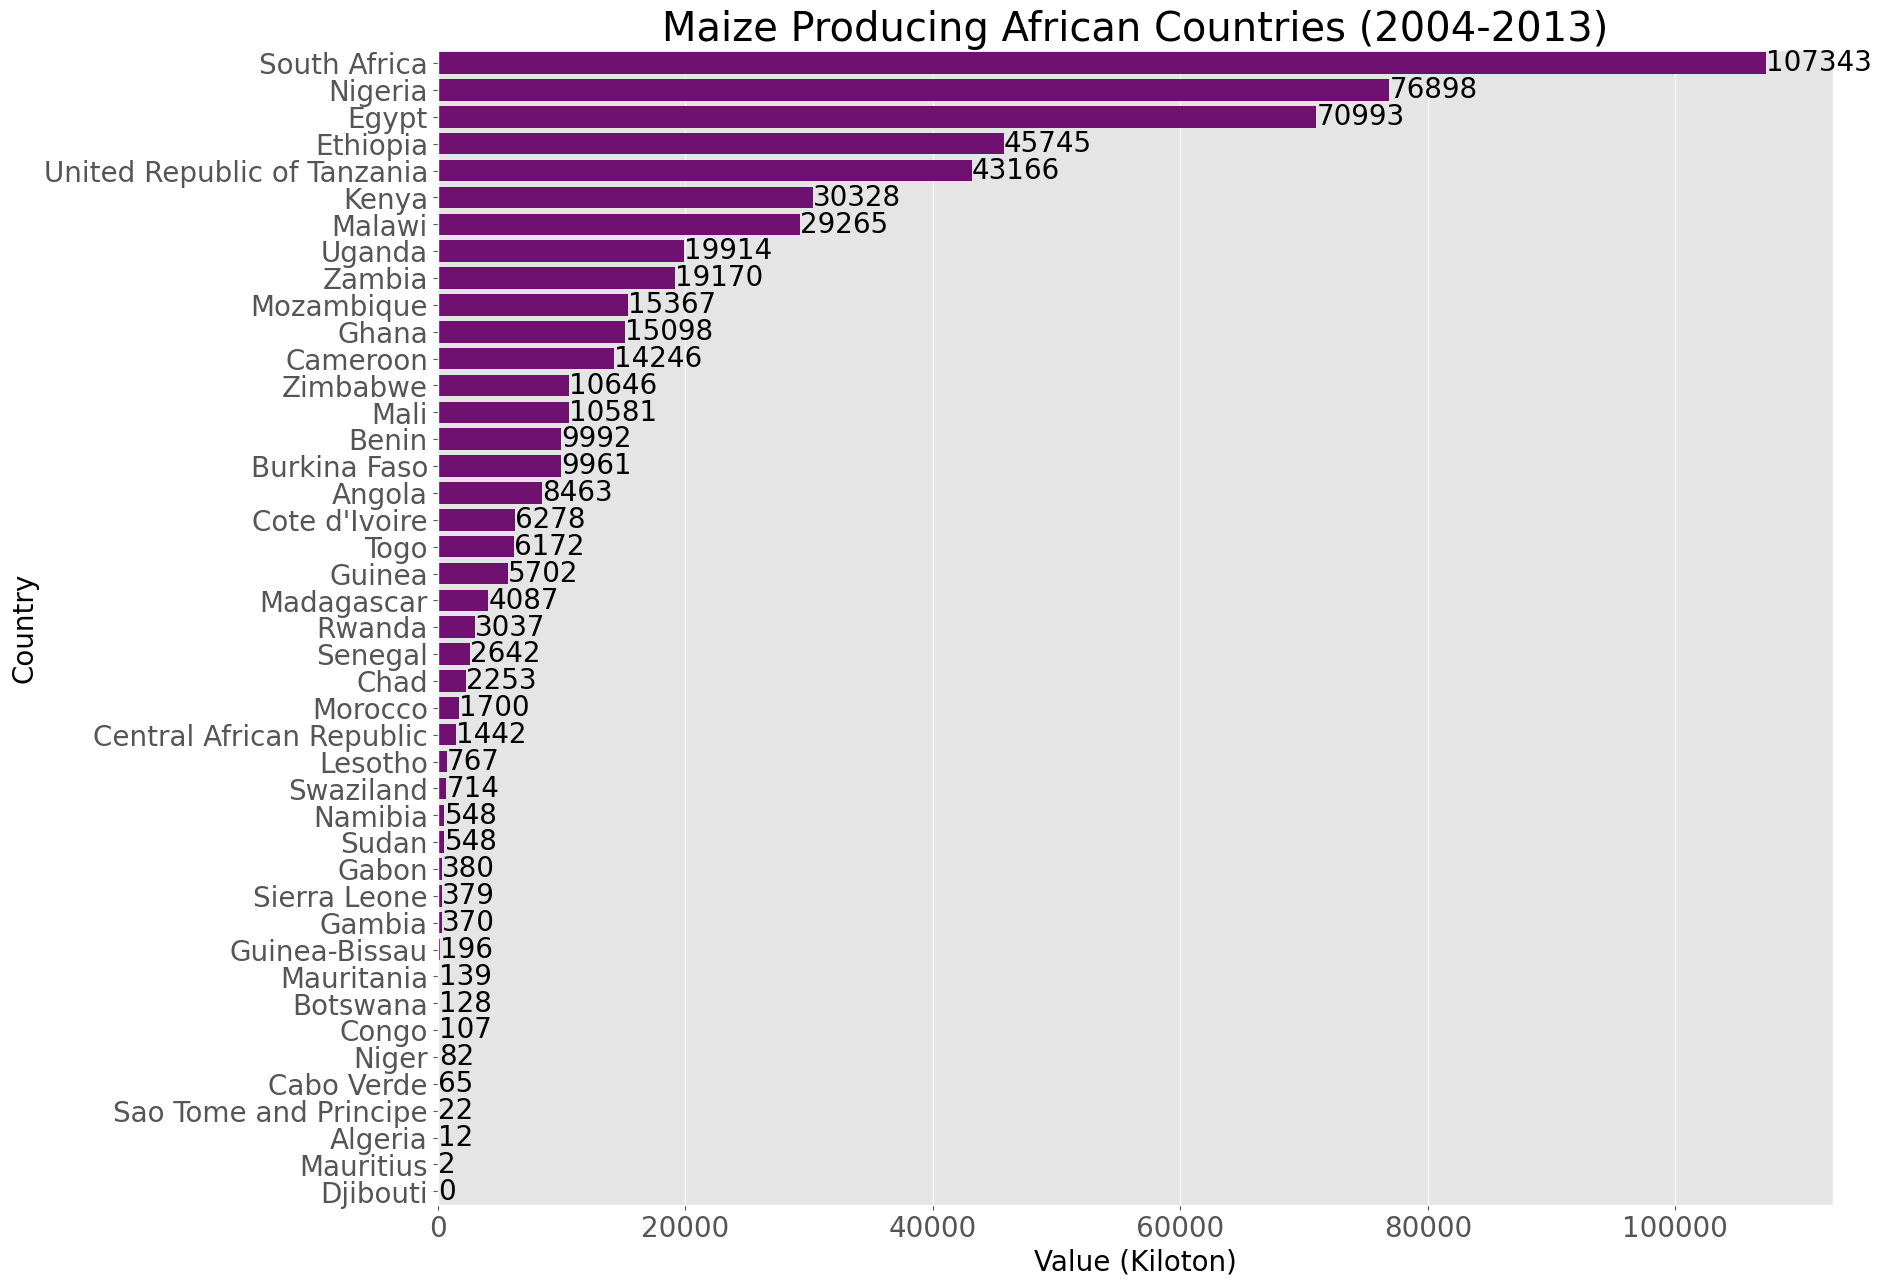

In [52]:
# Chart to display top Maize produing countries

top_maize_countries = pd.DataFrame(maize_producing_countries.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= top_maize_countries.Value, y= top_maize_countries.Country, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Maize Producing African Countries (2004-2013)')
plt.xlabel('Value (Kiloton)')
plt.ylabel('Country')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show()

South Africa is the top Maize producing country from 2004 to 2013 having a total production of 107,343 kiloton followed by Nigeria with total of 76,898 kiloton, Egypt 70,993 kiloton. Other countries values can be seen in the above table and chart.

Finnally, we can also say that the top 3 produced food were produced by the top 3 food producing country (Nigeria, Egypt and South Africa)

### Checking for Outlier

In [53]:
# geting the statistical description of the food production data
food_production.describe()

Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [54]:
# getting the average food production
food_production.mean()

Year     2008.498269
Value     327.785201
dtype: float64

In [55]:
# getting the median food production
food_production.median()

Year     2008.0
Value      18.0
dtype: float64

In [56]:
# getting the 25% quratile food production value for each year
fp_Q1 = food_production.quantile(0.25)
fp_Q1

Year     2006.0
Value       3.0
Name: 0.25, dtype: float64

In [63]:
# getting the 75% quratile food production value for each year
fp_Q3 = food_production.quantile(0.75)
fp_Q3

Year     2011.0
Value     108.0
Name: 0.75, dtype: float64

In [64]:
# getting our (IQR) interquatile range
fp_Q3 = 108.0
fp_Q1 = 3.0

fp_IQR = fp_Q3 - fp_Q1
fp_IQR

105.0

In [65]:
# getting the upper fence value
fp_upper_fence = fp_Q3 + ( 1.5 * fp_IQR)
fp_upper_fence

265.5

In [66]:
# getting the lower fence value
fp_lower_fence = fp_Q1 -( 1.5 * fp_IQR)
fp_lower_fence

-154.5

* Note: Any value that falls below the lower fence or upper fence is considered an outlier. Let's see which country or countries fall in these categories.

### Checking for outliers in Countries

In [67]:
# try to display the countries whose value is lower than the lower fence
# we get nothing displayed
food_production[food_production.Value < (fp_Q1 - (1.5 * fp_IQR))]

Empty DataFrame
Columns: [Country, Item, Year, Value, Unit]
Index: []

In [68]:
# try to display the countries whose value is higher than the upper fence
# we get nothing displayed
food_production[food_production.Value > (fp_Q1 + (1.5 * fp_IQR))]

Country                     Item  Year  Value Unit
0       Algeria       Wheat and products  2004   2731   kt
1       Algeria       Wheat and products  2005   2415   kt
2       Algeria       Wheat and products  2006   2688   kt
3       Algeria       Wheat and products  2007   2319   kt
4       Algeria       Wheat and products  2008   1111   kt
...         ...                      ...   ...    ...  ...
23085  Zimbabwe  Milk - Excluding Butter  2009    389   kt
23086  Zimbabwe  Milk - Excluding Butter  2010    396   kt
23087  Zimbabwe  Milk - Excluding Butter  2011    400   kt
23088  Zimbabwe  Milk - Excluding Butter  2012    410   kt
23089  Zimbabwe  Milk - Excluding Butter  2013    410   kt

[4830 rows x 5 columns]

In [69]:
# converting the results that displayed the outlier countries into a dataframe
outlier_countries = pd.DataFrame(food_production[food_production.Value > (fp_Q1 + (1.5 * fp_IQR))])

In [70]:
# checking the unique names of the outlier countries
outlier_countries['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire",
       'Egypt', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Swaziland', 'Togo', 'Tunisia', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'], dtype=object)

In [71]:
# checking the number of countries that are outliers
outlier_countries['Country'].nunique()

39

We see that 39 countries ouut of 45 countries are outliers in the fppd production data because their values are higher than the upper fence value.

Now, let's use a visualization to confirm this.

In [72]:
# visualizing the outlier countries with plotly(box plot)
px.box(outlier_countries, x = 'Country', y = 'Value', title = 'Outliers Countries in Food Production',
        labels = {'Country': 'Country', 'Value':'Value (kcal/person/day)'})

### Checking for outliers in Years

In [73]:
# Looking for outliers in years
outlier_year = pd.DataFrame(food_production[food_production.Value > (fp_Q1 + (1.5 * fp_IQR))])

In [74]:
# checking the number of years that are outliers
outlier_year['Year'].nunique()

10

We can see that 10 years are outliers, which means each year food prouction kept increasing.

In [75]:
# checking the years of the outliers
outlier_year['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype=int64)

# Importing Food Supply Data

In [76]:
# load the dataset into pandas dataframe
food_supply = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
food_supply

Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]

# Checking the Data

In [77]:
# Checking the information of the dataset
food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [78]:
# Looking at the descriptive statistics of our dataset
food_supply.describe()

Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000

In [79]:
# checking the number of unique countries in our data
food_supply['Country'].nunique()

45

In [80]:
# Checking for duplicated rows in our dataframe
food_supply.duplicated().sum()

0

In [81]:
# Cheking the number of unique values in the columns
food_supply.nunique()

Country     45
Year        10
Value      373
dtype: int64

In [82]:
# checking the number of unique countries in our data
food_supply['Country'].nunique()

45

In [83]:
# checking the number of unique years in our data
food_supply['Year'].nunique()

10

# Data Cleaning

In [84]:
# create a unit column cntaining the symbol of kilotone, which is the unit of the numbers in the Value column
food_supply['Unit'] = 'kcal/person/day'

In [85]:
# convert the Year column from object to datetime
food_supply['Year'] = pd.to_datetime(food_supply['Year'], format="%Y").dt.year

In [86]:
# checking if unit column has been added to the data
food_supply.head()

Country  Year  Value             Unit
0  Algeria  2004   2987  kcal/person/day
1  Algeria  2005   2958  kcal/person/day
2  Algeria  2006   3047  kcal/person/day
3  Algeria  2007   3041  kcal/person/day
4  Algeria  2008   3048  kcal/person/day

In [87]:
# groupby Country and year and show the total values of item supplied to each country for each year
supply = food_supply.groupby(['Country', 'Year'])
supply.first()

Value             Unit
Country  Year                        
Algeria  2004   2987  kcal/person/day
         2005   2958  kcal/person/day
         2006   3047  kcal/person/day
         2007   3041  kcal/person/day
         2008   3048  kcal/person/day
...              ...              ...
Zimbabwe 2009   2147  kcal/person/day
         2010   2168  kcal/person/day
         2011   2200  kcal/person/day
         2012   2197  kcal/person/day
         2013   2110  kcal/person/day

[450 rows x 2 columns]

# Exploratory Data Analysis (EDA)

#### what is the trends in food supply over the years.

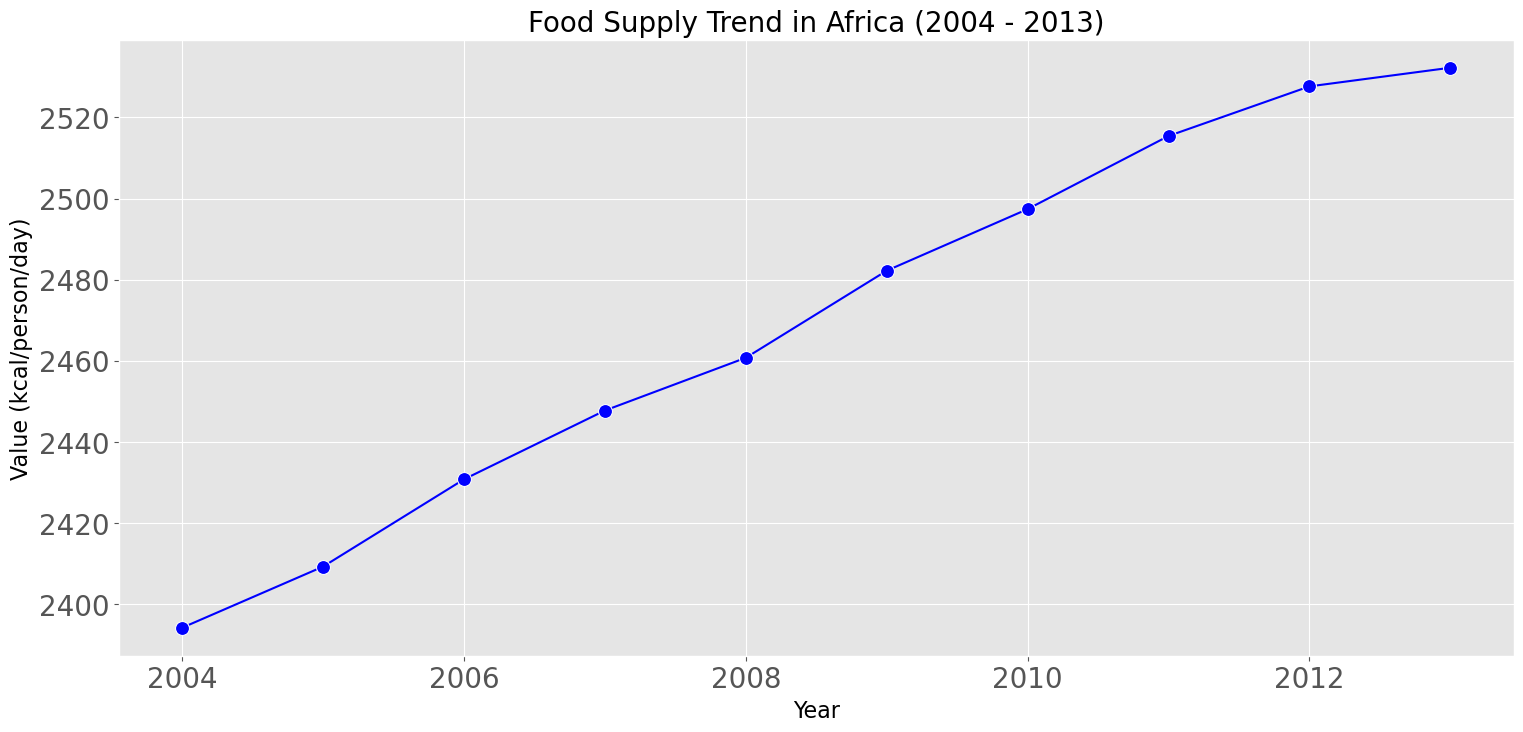

In [88]:
# visualizing the food supply trend over time with line plot
plt.figure(figsize=[18,8])

#set label sizes for axes, xtick and ytick
plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

sns.lineplot(data=food_supply, x="Year", y="Value", marker='o', markersize=10, ci=None, color='b')
plt.title("Food Supply Trend in Africa (2004 - 2013)", fontsize=20)
plt.ylabel('Value (kcal/person/day)', fontsize = 16)
plt.xlabel('Year', fontsize=16);

In [89]:
# visualizing the food supply trend over time with plotly(Histogram plot)
food_supply_trend = pd.DataFrame(food_supply.groupby(['Year', 'Country', 'Value'], as_index=False)['Value'].mean())

px.histogram(food_supply_trend, x='Year', y='Value', color ='Year', title = 'Food Supply Trend Over time (2004 - 2013)',
            labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})

From the above charts, we observe that food supply in African countries between 2004 and 2013 increased as the year increased.

#### What countries had the most food supply?

In [90]:
# descriptive statistics showing the top countries that had the most food supply.
food_supply.groupby(['Country'])['Value'].sum().sort_values(ascending=False)

Country
Egypt                          34580
Tunisia                        33055
Morocco                        32967
Algeria                        31118
Mauritius                      30543
South Africa                   29629
Ghana                          29180
Cote d'Ivoire                  27666
Mali                           27502
Mauritania                     27443
Gabon                          27299
Nigeria                        26988
Burkina Faso                   26072
Gambia                         25695
Lesotho                        25588
Cabo Verde                     25514
Benin                          25378
Guinea                         25180
Niger                          25024
Cameroon                       24603
Sao Tome and Principe          24462
Djibouti                       24165
Senegal                        23784
Togo                           23339
Sudan                          23238
Swaziland                      23171
Guinea-Bissau                 

In [91]:
# visualize the food supply data with plotly(line plot)
plt.figure(figsize=(10,10))
food_supply_plot = px.line(food_supply, x=food_supply['Year'],y=food_supply['Value'],
                          color=food_supply['Country'],
                          title ='Food Supply in Africa (2004-2013)',
                          labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})
food_supply_plot.update_layout(yaxis_type='log')
food_supply_plot

<Figure size 1000x1000 with 0 Axes>

The above chart is too clustered. so, i will plot a bar chart to amke it more readable and easy to unserstand.

In [92]:
# Table to show the countries that supplied food the most
pd.DataFrame(food_supply.groupby(['Country'])['Value'].sum().sort_values(ascending=False))

Value
Country                           
Egypt                        34580
Tunisia                      33055
Morocco                      32967
Algeria                      31118
Mauritius                    30543
South Africa                 29629
Ghana                        29180
Cote d'Ivoire                27666
Mali                         27502
Mauritania                   27443
Gabon                        27299
Nigeria                      26988
Burkina Faso                 26072
Gambia                       25695
Lesotho                      25588
Cabo Verde                   25514
Benin                        25378
Guinea                       25180
Niger                        25024
Cameroon                     24603
Sao Tome and Principe        24462
Djibouti                     24165
Senegal                      23784
Togo                         23339
Sudan                        23238
Swaziland                    23171
Guinea-Bissau                22963
Malawi                       22925
Angola                       22556
Sierra Leone                 22291
Botswana                     22263
Uganda                       22205
Liberia                      21827
Mozambique                   21702
Namibia                      21602
United Republic of Tanzania  21550
Congo                        21530
Kenya                        21453
Rwanda                       21309
Zimbabwe                     21209
Central African Republic     20719
Madagascar                   20608
Chad                         20511
Ethiopia                     20292
Zambia                       18701

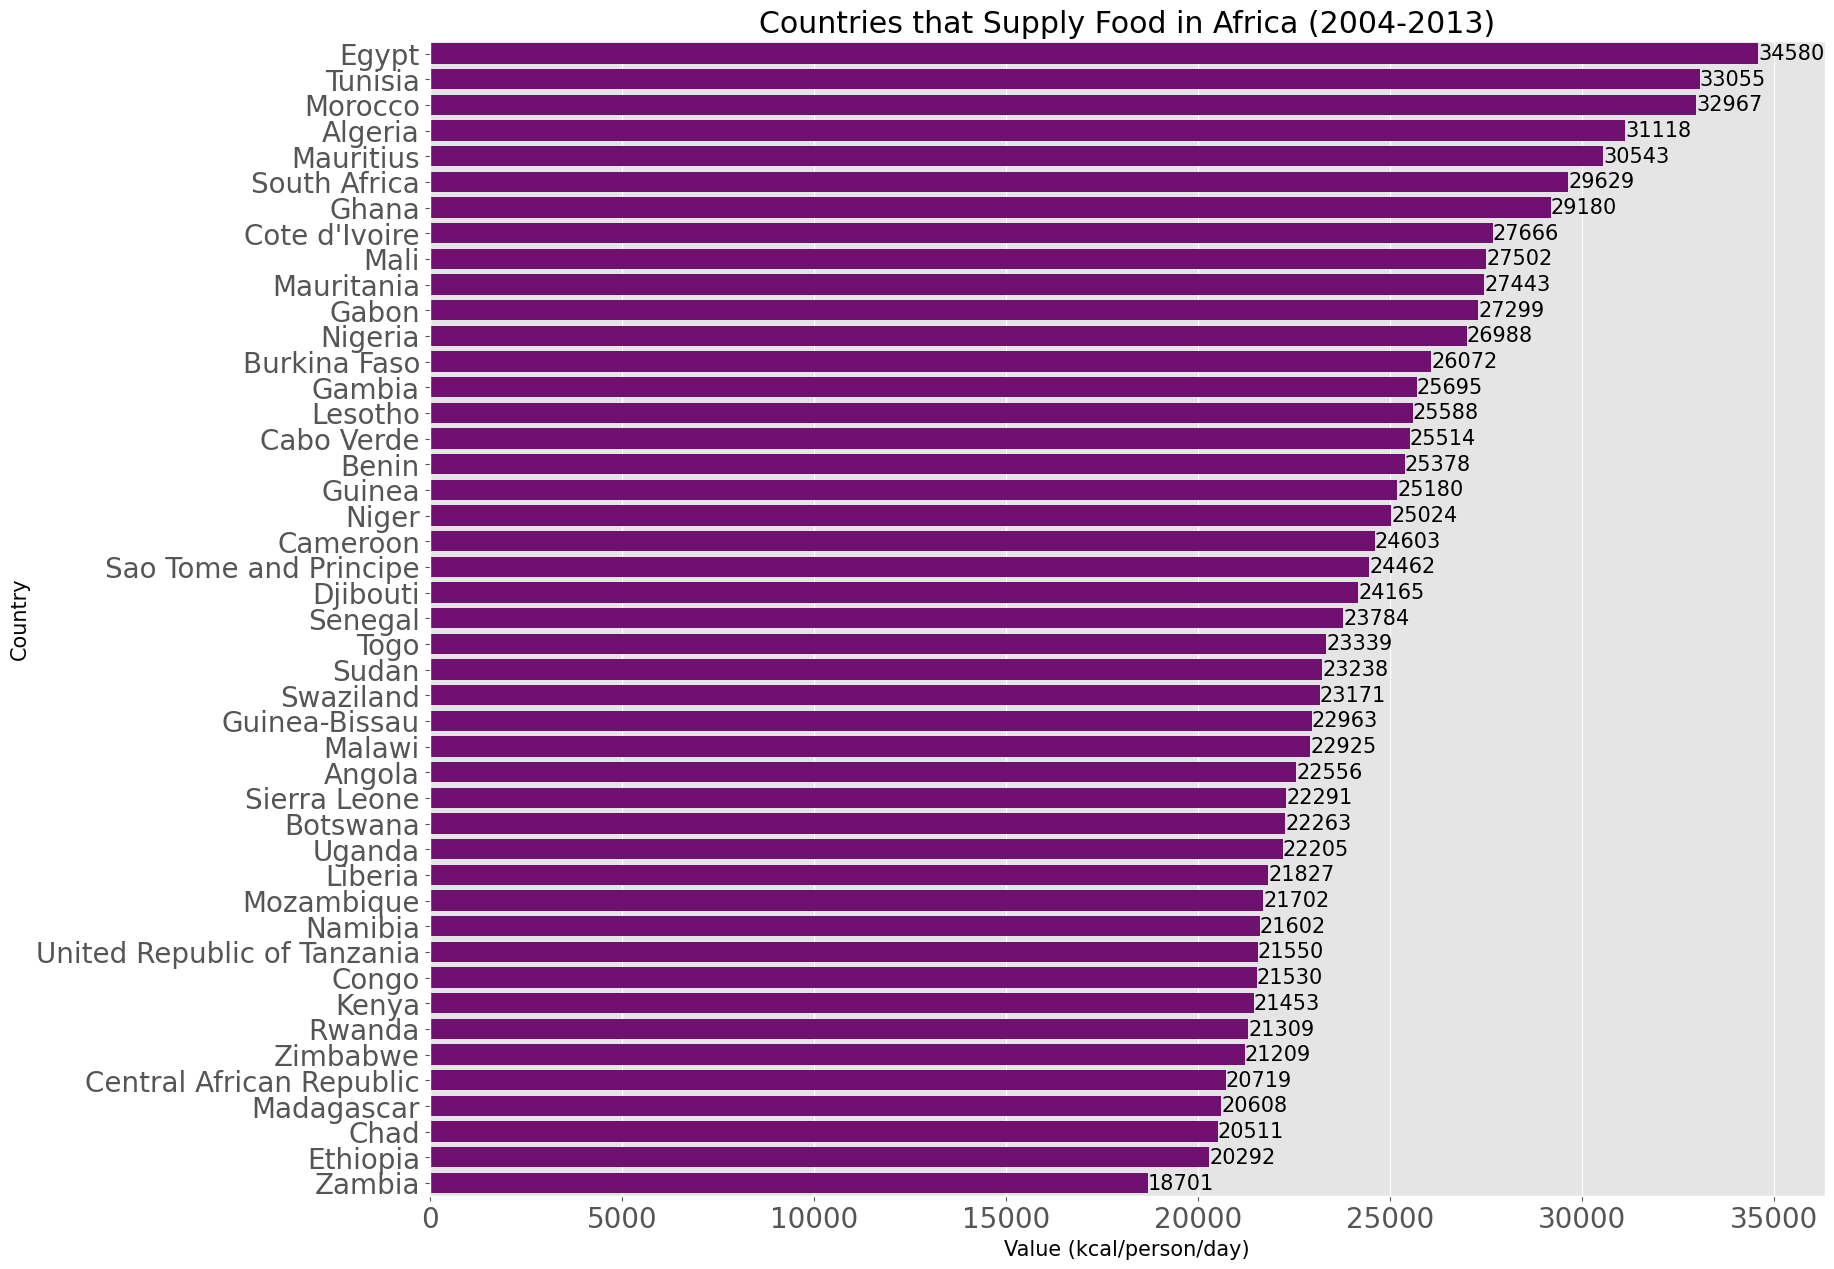

In [93]:
# Chart to display top Maize produing countries

top_suppliers = pd.DataFrame(food_supply.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()
plt.rcParams['figure.figsize'] = (18, 15)
r = sns.barplot(x= top_suppliers.Value, y= top_suppliers.Country, color="purple")

for i in r.containers:
    r.bar_label(i)
    
plt.title('Countries that Supply Food in Africa (2004-2013)')
plt.xlabel('Value (kcal/person/day)')
plt.ylabel('Country')

plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show();

* This visualizations reveal that Egypt is the top food supplying country in Africa from 2004 to 2013,followed by Tunisia, and Morocco.

* Despite the fact that Nigeria, Egypt, and South Africa were the top three food producing nations between those years according to the food production dataset.

* However, South Africa was the 6th supplying country while Nigeria was the 12th supplying country.

# Checking for Outliers in Food Supply

In [94]:
# Descriotion of the dataset
food_supply.describe()

Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000

In [95]:
# visualizing food supply data with plotly(box plot)
supply_plot= px.box(data_frame=food_supply,
                             x='Year',
                             y='Value',
                             color='Year',
                             title='Food Supply in 45 African countries (2004 - 2013)',
                             labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})
supply_plot.show()

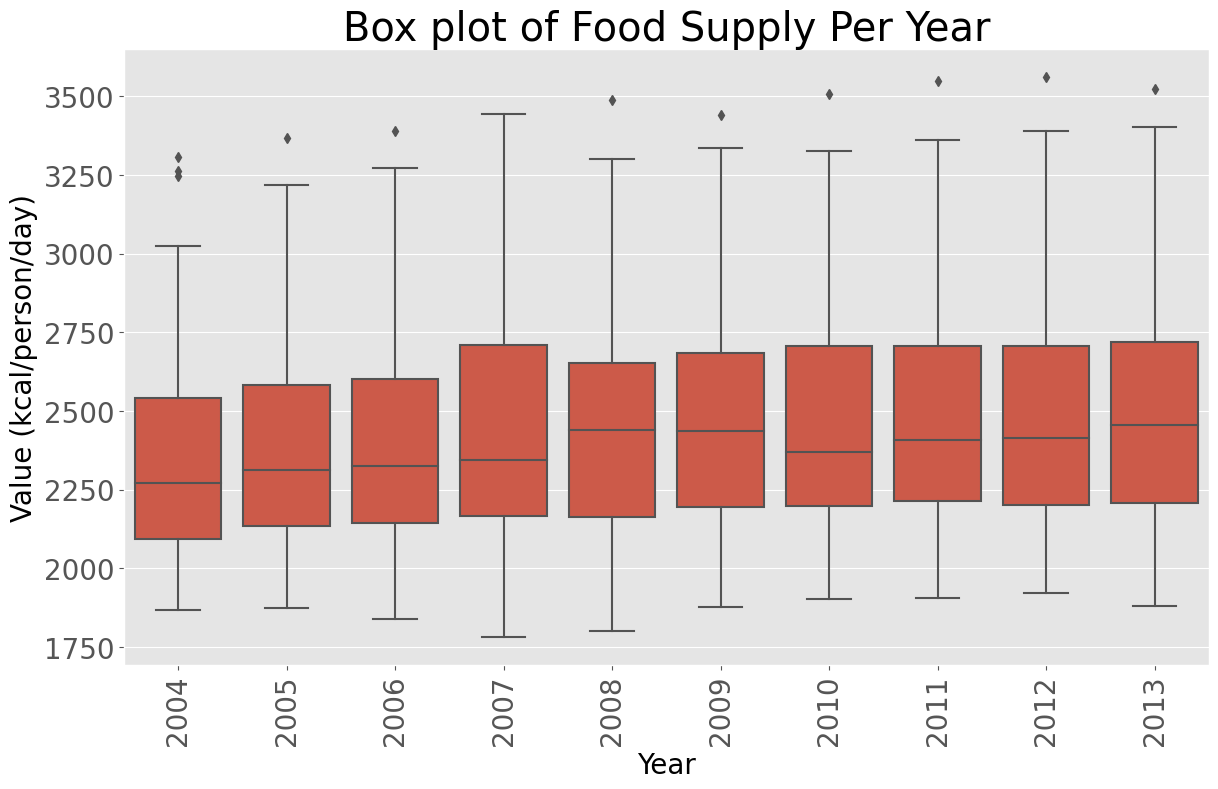

In [96]:
# visualizing the food supply data with seaborn boxplot

plt.figure(figsize=[14, 8])

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

base_color = sns.color_palette()[0]
sns.boxplot(data=food_supply, y='Value', x='Year', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Value (kcal/person/day)')
plt.title('Box plot of Food Supply Per Year');

Looking at the boxplot, we could see that for example we have an outlier in 2012. Let's analyze our data further and find out which country was that.

In [97]:
# getting food supply data for 2012 only
food_supply_2012 = food_supply[food_supply['Year']==2012]
food_supply_2012

Country  Year  Value             Unit
8                        Algeria  2012   3272  kcal/person/day
18                        Angola  2012   2384  kcal/person/day
28                         Benin  2012   2610  kcal/person/day
38                      Botswana  2012   2342  kcal/person/day
48                  Burkina Faso  2012   2707  kcal/person/day
58                    Cabo Verde  2012   2590  kcal/person/day
68                      Cameroon  2012   2622  kcal/person/day
78      Central African Republic  2012   2116  kcal/person/day
88                          Chad  2012   2124  kcal/person/day
98                         Congo  2012   2158  kcal/person/day
108                Cote d'Ivoire  2012   2780  kcal/person/day
118                     Djibouti  2012   2545  kcal/person/day
128                        Egypt  2012   3561  kcal/person/day
138                     Ethiopia  2012   2124  kcal/person/day
148                        Gabon  2012   2795  kcal/person/day
158                       Gambia  2012   2652  kcal/person/day
168                        Ghana  2012   3043  kcal/person/day
178                       Guinea  2012   2561  kcal/person/day
188                Guinea-Bissau  2012   2331  kcal/person/day
198                        Kenya  2012   2192  kcal/person/day
208                      Lesotho  2012   2547  kcal/person/day
218                      Liberia  2012   2200  kcal/person/day
228                   Madagascar  2012   2058  kcal/person/day
238                       Malawi  2012   2333  kcal/person/day
248                         Mali  2012   2860  kcal/person/day
258                   Mauritania  2012   2873  kcal/person/day
268                    Mauritius  2012   3014  kcal/person/day
278                      Morocco  2012   3366  kcal/person/day
288                   Mozambique  2012   2298  kcal/person/day
298                      Namibia  2012   2145  kcal/person/day
308                        Niger  2012   2567  kcal/person/day
318                      Nigeria  2012   2665  kcal/person/day
328                       Rwanda  2012   2270  kcal/person/day
338        Sao Tome and Principe  2012   2338  kcal/person/day
348                      Senegal  2012   2443  kcal/person/day
358                 Sierra Leone  2012   2374  kcal/person/day
368                 South Africa  2012   3014  kcal/person/day
370                        Sudan  2012   2301  kcal/person/day
388                    Swaziland  2012   2293  kcal/person/day
398                         Togo  2012   2414  kcal/person/day
408                      Tunisia  2012   3390  kcal/person/day
418                       Uganda  2012   2160  kcal/person/day
428  United Republic of Tanzania  2012   2192  kcal/person/day
438                       Zambia  2012   1923  kcal/person/day
448                     Zimbabwe  2012   2197  kcal/person/day

## Finding statistical measures which will help determine which values in the dataset are outliers

In [98]:
food_supply.describe()

Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000

In [99]:
# food supply median value for each year
food_supply.groupby(['Year'])['Value'].median()

Year
2004    2271.0
2005    2311.0
2006    2325.0
2007    2344.0
2008    2439.0
2009    2435.0
2010    2370.0
2011    2407.0
2012    2414.0
2013    2456.0
Name: Value, dtype: float64

In [100]:
# food supply mean value for each year
food_supply.groupby(['Year'])['Value'].mean().round(1)

Year
2004    2394.2
2005    2409.3
2006    2430.8
2007    2447.8
2008    2460.8
2009    2482.2
2010    2497.4
2011    2515.4
2012    2527.6
2013    2532.2
Name: Value, dtype: float64

Lets narrow it down to 2012 since we have outlier there.

In [101]:
#statistical mesaures of year 2012
pd.DataFrame(food_supply.query('Year==2012')['Value'].describe().round(2))

Value
count    45.00
mean   2527.64
std     388.47
min    1923.00
25%    2200.00
50%    2414.00
75%    2707.00
max    3561.00

In [102]:
# food supply median value for 2012 alone
food_supply.query('Year==2012')['Value'].median()

2414.0

In [103]:
# food supply mean value for 2012
food_supply.query('Year==2012')['Value'].mean().round(1)

2527.6

#### Getting Quartile Values

In [104]:
# food supply: 25% quratile (Q1) value for 2012
Q1=food_supply.query('Year==2012')['Value'].quantile(0.25)
Q1

2200.0

In [105]:
# food supply: 75% quratile (Q3) value for 2012
Q3 = food_supply.query('Year==2012')['Value'].quantile(0.75)
Q3

2707.0

In [106]:
# To get the interquatile range (IQR) (Q3 - Q1)
IQR =Q3 -Q1
IQR

507.0

In [107]:
lower_fence = Q1 -( 1.5 * IQR)
lower_fence

1439.5

In [108]:
upper_fence = Q3 + ( 1.5 * IQR)
upper_fence

3467.5

### Checking for the Outlier

Remember, any country that has a value greater than the upper fence value is an outlier. So, let's see which country it is.

In [109]:
# check if value of any country is lower than the lower fence
food_supply_2012[food_supply_2012.Value < (Q1 - ( 1.5 * IQR))].any()

Country    False
Year       False
Value      False
Unit       False
dtype: bool

In [110]:
# check if value of any country is higher than the upper fence
food_supply_2012[food_supply_2012.Value > (Q1 + ( 1.5 * IQR))].any()

Country    True
Year       True
Value      True
Unit       True
dtype: bool

In [111]:
# display the country(s) that is lower than the lower fence
food_supply_2012[food_supply_2012.Value < (Q1 - ( 1.5 * IQR))]

Empty DataFrame
Columns: [Country, Year, Value, Unit]
Index: []

In [112]:
#  display the country(s) that is greater than the upper fence
food_supply_2012[food_supply_2012.Value > (Q1 + ( 1.5 * IQR))].sort_values(by=['Value'], ascending=False)

Country  Year  Value             Unit
128         Egypt  2012   3561  kcal/person/day
408       Tunisia  2012   3390  kcal/person/day
278       Morocco  2012   3366  kcal/person/day
8         Algeria  2012   3272  kcal/person/day
168         Ghana  2012   3043  kcal/person/day
268     Mauritius  2012   3014  kcal/person/day
368  South Africa  2012   3014  kcal/person/day

* The lower fence is 1439.5 while the upper fence is 3467.5

From the table above, We see that Egypt is the outlier because it's value is higher than the upper fence value.

Now, let's use a visualization to confirm this.

In [113]:
# visualization of 2012 food supply (to also see the outlier)
px.line(food_supply_2012, x = 'Country', y = 'Value', color ='Year', title = 'Food Supply 2012',
        labels = {'Country': 'Country', 'Value':'Value (kcal/person/day)'})

In [114]:
value_2012 = food_supply_2012['Value']
country_2012 = food_supply_2012['Country']

In [ ]:
# visualizing the outlier with matplotlib (lineplot)
plt.figure(figsize=[16, 7])

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

plt.plot(country_2012, value_2012,
    linewidth=1.5,
    linestyle='--',
    color='b',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
plt.xticks(rotation=90)
plt.title('Distribution of Food Supply in 2012');
plt.ylabel('Value (kcal/person/day)')
plt.xlabel('Country');

We can see clearly that Egypt is the outlier. Therefore, it is clear that compared to other African nations, Egypt had a substantially bigger supply of food accessible for consumption in 2012.

# Use and Test of Hypothesis

A hypothesis serves as a proposed explanation for a question arising from an observation, event, or problem. While hypotheses remain unproven, they are subject to testing. 

The objective is not to affirm the correctness of a hypothesis but to engage in logical thinking, formulate predictions, and conduct tests to enhance understanding and knowledge.

Rice is a carbohydrate food eaten in most parts of the world. It plays a major role in feeding the world. In fact, rice was the third most produced food worldwide in 2014, according to the FAO.

Using the Pearson hypothesis test we can determine whether the Pearson's correlation coefficient, ρ (Greek small letter rho) is “near 0” or “significantly far from 0”, based on the sample correlation coefficient, r and the sample size n.

Certainly, rice is a global staple, but the question arises: Does the rice production across the African continent show an upward trend alongside its growing population? Put differently, is there a correlation between the total rice production in Africa (measured in kilotons) and the continent's population?

# Getting Population Dataset

The population dataset that we will use is the data gotten from the World Bank Open Data Portal. The data holds the population data of 267 countries from 1960 to 2021.

In [199]:
# Reading the population data
population = pd.read_csv('World Population.csv')
population

Country Name Country Code                Indicator Name  \
0                          Aruba          ABW  Population growth (annual %)   
1    Africa Eastern and Southern          AFE  Population growth (annual %)   
2                    Afghanistan          AFG  Population growth (annual %)   
3     Africa Western and Central          AFW  Population growth (annual %)   
4                         Angola          AGO  Population growth (annual %)   
..                           ...          ...                           ...   
261                       Kosovo          XKX  Population growth (annual %)   
262                  Yemen, Rep.          YEM  Population growth (annual %)   
263                 South Africa          ZAF  Population growth (annual %)   
264                       Zambia          ZMB  Population growth (annual %)   
265                     Zimbabwe          ZWE  Population growth (annual %)   

    Indicator Code  1960      1961      1962      1963      1964      1965  \
0      SP.POP.GROW   NaN  2.179059  1.548572  1.389337  1.215721  1.032841   
1      SP.POP.GROW   NaN  2.660180  2.732633  2.753248  2.806915  2.840787   
2      SP.POP.GROW   NaN  1.925952  2.014879  2.078997  2.139651  2.216007   
3      SP.POP.GROW   NaN  2.115789  2.145723  2.190827  2.211360  2.242567   
4      SP.POP.GROW   NaN  1.558355  1.460738  1.410425  1.301745  1.111041   
..             ...   ...       ...       ...       ...       ...       ...   
261    SP.POP.GROW   NaN  1.986474  2.857337  2.777956  2.702867  2.631731   
262    SP.POP.GROW   NaN  1.862737  1.872291  1.839467  1.920052  2.046198   
263    SP.POP.GROW   NaN  2.799492  2.978651  3.033440  3.061378  3.091501   
264    SP.POP.GROW   NaN  3.156056  3.178563  3.196632  3.194441  3.201590   
265    SP.POP.GROW   NaN  3.094865  3.105320  3.115408  3.119878  3.124829   

     ...      2013      2014      2015      2016      2017      2018  \
0    ...  0.749301  0.691615  0.637959  0.590062  0.537296  0.494795   
1    ...  2.780207  2.774990  2.802586  2.728159  2.655672  2.688371   
2    ...  3.466788  3.657576  3.121341  2.581549  2.866492  2.885208   
3    ...  2.761839  2.750731  2.723317  2.713059  2.706266  2.669239   
4    ...  3.735525  3.684429  3.617678  3.586211  3.550987  3.464457   
..   ...       ...       ...       ...       ...       ...       ...   
261  ...  0.607468 -0.294474 -1.364932 -0.596734  0.753585  0.339011   
262  ...  2.859237  2.811072  2.712955  2.621537  2.564321  2.486360   
263  ...  1.361621  1.576294  2.074017  0.972004  0.387278  1.225530   
264  ...  3.271299  3.247118  3.191896  3.147407  3.113595  3.061888   
265  ...  2.163267  2.191391  2.136294  2.081806  2.043620  2.020537   

         2019      2020      2021      2022  
0    0.451970  0.134255 -0.045045 -0.086392  
1    2.691134  2.678184  2.607472  2.540937  
2    2.908529  3.134747  2.851358  2.534498  
3    2.633982  2.615646  2.573377  2.539799  
4    3.395278  3.268348  3.166030  3.096753  
..        ...       ...       ...       ...  
261 -0.457730  0.070131 -0.229016 -1.355874  
262  2.426208  2.310447  2.137790  2.144628  
263  1.295074  1.223179  0.998920  0.841058  
264  3.007618  2.933818  2.840806  2.758032  
265  1.989253  2.031112  2.045715  2.024036  

[266 rows x 67 columns]

In [200]:
# checking the columns in our dataset
population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [201]:
# We won't be needing all the data, so we need to delete unwanted columns and rows
# we need the data of the years 2004 to 2013
# we need the data for the 45 African countries we've been working with in the supply and production dataset

population.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis=1, inplace=True)
    
population

Country Name      2004      2005      2006      2007  \
0                          Aruba  0.900989  1.003077  1.181566  1.227711   
1    Africa Eastern and Southern  2.644968  2.666242  2.702521  2.747109   
2                    Afghanistan  3.933178  3.576508  4.139678  1.793196   
3     Africa Western and Central  2.828642  2.841211  2.832780  2.828409   
4                         Angola  3.506389  3.557659  3.592013  3.639589   
..                           ...       ...       ...       ...       ...   
261                       Kosovo  0.067839  0.067910  0.803200  0.803262   
262                  Yemen, Rep.  2.661827  2.793086  2.983230  3.027681   
263                 South Africa  0.935290  0.945094  0.963593  1.013877   
264                       Zambia  3.178936  3.312670  3.456237  3.532921   
265                     Zimbabwe  0.701856  0.523851  0.861223  0.969119   

         2008      2009      2010      2011      2012      2013  
0    1.241397  1.233231  1.131541  0.939356  0.810231  0.749301  
1    2.765816  2.755745  2.757929  2.738185  2.740405  2.780207  
2    2.002333  3.561288  2.894904  3.689508  4.077628  3.466788  
3    2.832916  2.844037  2.846536  2.848826  2.812851  2.761839  
4    3.670909  3.693482  3.734798  3.758796  3.758703  3.735525  
..        ...       ...       ...       ...       ...       ...  
261  0.803213  0.803172  0.803249  0.859067  0.895255  0.607468  
262  2.991121  2.958855  2.929491  2.914067  2.893027  2.859237  
263  1.133081  1.189295  1.193036  1.263406  1.329159  1.361621  
264  3.571097  3.554843  3.497191  3.377110  3.301480  3.271299  
265  0.798207  1.026265  1.253650  1.438339  1.822309  2.163267  

[266 rows x 11 columns]

In [202]:
# checking the total number of countries in population dataset
population['Country Name'].nunique()

266

In [203]:
#To check the total number of countried in the food producition data set
food_production['Country'].nunique()

40

In [204]:
# checking the names of 45 African Countries we've been working with using the food_production dataset
food_production['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       "Cote d'Ivoire", 'Djibouti', 'Ethiopia', 'Gabon', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [205]:
# Create a list to store the 45 African countries (in the prodiction data)
africa_production_list = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe']

In [206]:
# a dataframe to get only the names of African countries in food producion data

africa_population = population[population['Country Name'].isin(africa_production_list)]
africa_population

Country Name      2004      2005      2006      2007  \
4                      Angola  3.506389  3.557659  3.592013  3.639589   
18                      Benin  3.026457  3.177348  3.059823  2.875557   
19               Burkina Faso  3.138021  3.148993  3.122482  3.032786   
33                   Botswana  1.748414  1.797648  1.878736  1.964957   
34   Central African Republic  2.169017  2.251328  2.011502  1.873590   
41              Cote d'Ivoire  2.337456  2.267514  2.209656  2.160880   
42                   Cameroon  2.744622  2.733160  2.719034  2.780671   
47                 Cabo Verde  1.343599  1.275071  1.221540  1.165597   
56                   Djibouti  1.472468  1.514429  1.917561  2.131795   
60                    Algeria  1.407273  1.364082  1.441137  1.627909   
72                   Ethiopia  2.872414  2.839623  2.826729  2.851544   
80                      Gabon  2.769763  2.868813  2.984530  3.095610   
83                      Ghana  2.668909  2.659895  2.639161  2.605464   
85                     Guinea  2.129239  1.978668  2.062914  2.293356   
87              Guinea-Bissau  2.355346  2.398893  2.461142  2.547104   
121                     Kenya  2.989515  2.976581  2.974711  2.965825   
131                   Liberia  1.200926  4.504637  5.627400  5.004983   
141                   Lesotho -0.384375 -0.401736 -0.032573  0.337606   
148                   Morocco  1.245878  1.319053  1.309479  1.287722   
151                Madagascar  2.927035  2.923286  2.926752  2.926525   
158                      Mali  3.266628  3.305460  3.305692  3.302087   
165                Mozambique  2.611474  2.589776  2.563780  2.592132   
166                Mauritania  2.169899  2.208035  2.260472  2.318694   
167                 Mauritius  0.627104  0.592100  0.466404  0.455526   
168                    Malawi  2.640040  2.736342  2.803458  2.834482   
171                   Namibia  1.244221  1.202340  1.199835  1.247324   
173                     Niger  3.549183  3.588175  3.614426  3.641206   
174                   Nigeria  2.695503  2.693693  2.695926  2.709627   
203                    Rwanda  2.579210  2.631693  2.664807  2.693707   
206                     Sudan  2.253926  2.429454  2.647036  2.789964   
207                   Senegal  2.500339  2.541264  2.602334  2.632812   
210              Sierra Leone  3.352354  2.674841  2.200364  2.202654   
219     Sao Tome and Principe  2.526952  2.494360  2.471072  2.455647   
229                      Chad  4.436027  3.991749  3.540781  3.387190   
232                      Togo  2.625567  2.596251  2.807802  2.907439   
243                   Tunisia  0.960926  0.929565  0.912372  0.919464   
247                    Uganda  2.958481  2.906232  2.915022  2.933541   
263              South Africa  0.935290  0.945094  0.963593  1.013877   
264                    Zambia  3.178936  3.312670  3.456237  3.532921   
265                  Zimbabwe  0.701856  0.523851  0.861223  0.969119   

         2008      2009      2010      2011      2012      2013  
4    3.670909  3.693482  3.734798  3.758796  3.758703  3.735525  
18   2.947742  2.943354  2.934927  2.928111  2.915012  2.899921  
19   2.943569  2.931408  2.939268  2.969738  3.031880  3.008422  
33   2.030265  2.054991  2.060952  2.005557  1.920856  1.905627  
34   2.073263  2.154854  2.071208  1.532277  0.868655  0.608248  
41   2.130515  2.117819  2.116362  2.075245  2.055435  2.061926  
42   2.836971  2.846622  2.851215  2.831237  2.814984  2.813538  
47   1.103976  1.033564  1.075190  1.203181  1.195245  1.131690  
56   2.024002  2.042348  1.988307  1.897892  1.849339  1.812671  
60   1.708972  1.795904  1.858702  1.898394  1.943102  1.966716  
72   2.838632  2.803576  2.820982  2.850297  2.827656  2.749621  
80   3.188077  3.292977  3.421971  3.525162  3.558223  3.505157  
83   2.572327  2.535505  2.469996  2.438182  2.460596  2.452427  
85   2.408194  2.439762  2.458278  2.471311  2.448753  2.442316  
87   2.576458  2.571083  2.586997

In [207]:
# make a copy of the african population data
africa_pop = africa_population.copy()

In [208]:
# checking the total number of the countries
africa_pop['Country Name'].nunique()

40

Observing that only 40 countries align with the list we're currently utilizing, it's worth noting that the original datasets for African production and supply each comprised a total of 45 countries. 

Now, let's identify the five countries that are absent from the population list.

In [209]:
# Getting the names of the countries in the population datafarme and storing them in a list
africa_pop_list = africa_population['Country Name'].unique()
africa_pop_list

array(['Angola', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', "Cote d'Ivoire", 'Cameroon',
       'Cabo Verde', 'Djibouti', 'Algeria', 'Ethiopia', 'Gabon', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Lesotho',
       'Morocco', 'Madagascar', 'Mali', 'Mozambique', 'Mauritania',
       'Mauritius', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sudan', 'Senegal', 'Sierra Leone', 'Sao Tome and Principe',
       'Chad', 'Togo', 'Tunisia', 'Uganda', 'South Africa', 'Zambia',
       'Zimbabwe'], dtype=object)

In [210]:
# confirm if the number of coutries we have in our food produlation dataset is equal to the number of countries
# we have in the final population dataset
africa_pop_list == africa_production_list

False

In [211]:
# Getting the names of the countries that are missing in the population list 
print(set(africa_pop_list) ^ set(africa_production_list))

{'United Republic of Tanzania', 'Congo', 'Gambia', 'Swaziland', 'Egypt'}


The analysis above reveals the names of countries present in the food production dataset but absent from the population data. Evidently, these five countries are not included in the population dataset. Consequently, we will remove the data corresponding to these countries from our food production dataset to ensure accurate results in the hypothesis testing.

In [212]:
# making a copy of the food production data this is to enable us delete the 5 countries that are in the production 
# dateset but not in the population dataset. Also not to affect the original data and mess up the code (output) in the 
# early part of this project

food_production_copy = food_production.copy()
food_production_copy

Country                Item  Year  Value Unit
0       Algeria  Wheat and products  2004   2731   kt
1       Algeria  Wheat and products  2005   2415   kt
2       Algeria  Wheat and products  2006   2688   kt
3       Algeria  Wheat and products  2007   2319   kt
4       Algeria  Wheat and products  2008   1111   kt
...         ...                 ...   ...    ...  ...
23105  Zimbabwe         Crustaceans  2009      0   kt
23106  Zimbabwe         Crustaceans  2010      0   kt
23107  Zimbabwe         Crustaceans  2011      0   kt
23108  Zimbabwe         Crustaceans  2012      0   kt
23109  Zimbabwe         Crustaceans  2013      0   kt

[20340 rows x 5 columns]

In [213]:
# removing the extra five countries so the number of countries will match the number in our population list
indexNames = food_production_copy[(food_production_copy['Country'] == 'Egypt') | (food_production['Country'] == 'Congo') | 
                             (food_production_copy['Country'] == 'Swaziland') | (food_production['Country'] == 'Gambia') | 
                             (food_production_copy['Country'] == 'United Republic of Tanzania')].index
food_production_copy.drop(indexNames, inplace=True)
food_production_copy

Country                Item  Year  Value Unit
0       Algeria  Wheat and products  2004   2731   kt
1       Algeria  Wheat and products  2005   2415   kt
2       Algeria  Wheat and products  2006   2688   kt
3       Algeria  Wheat and products  2007   2319   kt
4       Algeria  Wheat and products  2008   1111   kt
...         ...                 ...   ...    ...  ...
23105  Zimbabwe         Crustaceans  2009      0   kt
23106  Zimbabwe         Crustaceans  2010      0   kt
23107  Zimbabwe         Crustaceans  2011      0   kt
23108  Zimbabwe         Crustaceans  2012      0   kt
23109  Zimbabwe         Crustaceans  2013      0   kt

[20340 rows x 5 columns]

In [214]:
# checking for the number of countries
food_production.nunique()

Country      40
Item         94
Year         10
Value      1911
Unit          1
dtype: int64

In [215]:
# Now checking if it now matches the list of countries in our population list
List == africa_pop_list

array([False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [216]:
# let's the the mean population for all the african countries
# first load the population data
africa_pop.head()

Country Name      2004      2005      2006      2007  \
4                     Angola  3.506389  3.557659  3.592013  3.639589   
18                     Benin  3.026457  3.177348  3.059823  2.875557   
19              Burkina Faso  3.138021  3.148993  3.122482  3.032786   
33                  Botswana  1.748414  1.797648  1.878736  1.964957   
34  Central African Republic  2.169017  2.251328  2.011502  1.873590   

        2008      2009      2010      2011      2012      2013  
4   3.670909  3.693482  3.734798  3.758796  3.758703  3.735525  
18  2.947742  2.943354  2.934927  2.928111  2.915012  2.899921  
19  2.943569  2.931408  2.939268  2.969738  3.031880  3.008422  
33  2.030265  2.054991  2.060952  2.005557  1.920856  1.905627  
34  2.073263  2.154854  2.071208  1.532277  0.868655  0.608248

In [217]:
# use the .melt method to group 
africa_pop = pd.melt(africa_pop, id_vars=['Country Name'],var_name='Year')
africa_pop

Country Name  Year     value
0                      Angola  2004  3.506389
1                       Benin  2004  3.026457
2                Burkina Faso  2004  3.138021
3                    Botswana  2004  1.748414
4    Central African Republic  2004  2.169017
..                        ...   ...       ...
395                   Tunisia  2013  1.120393
396                    Uganda  2013  2.876748
397              South Africa  2013  1.361621
398                    Zambia  2013  3.271299
399                  Zimbabwe  2013  2.163267

[400 rows x 3 columns]

In [218]:
#Reaname the value coloumn
africa_pop.rename(columns={'value': 'Population'}, inplace = True)
africa_pop

Country Name  Year  Population
0                      Angola  2004    3.506389
1                       Benin  2004    3.026457
2                Burkina Faso  2004    3.138021
3                    Botswana  2004    1.748414
4    Central African Republic  2004    2.169017
..                        ...   ...         ...
395                   Tunisia  2013    1.120393
396                    Uganda  2013    2.876748
397              South Africa  2013    1.361621
398                    Zambia  2013    3.271299
399                  Zimbabwe  2013    2.163267

[400 rows x 3 columns]

In [219]:
# Population mean for each year
africa_pop = africa_pop.groupby('Year').mean()
africa_pop

Population
Year            
2004    2.287057
2005    2.351197
2006    2.397659
2007    2.417712
2008    2.423648
2009    2.425397
2010    2.416239
2011    2.431316
2012    2.409788
2013    2.359200

In [220]:
# getting rice production data alone
rice_production = food_production[food_production_copy.Item == 'Rice (Milled Equivalent)']
rice_production

Country                      Item  Year  Value Unit
10      Algeria  Rice (Milled Equivalent)  2004      0   kt
11      Algeria  Rice (Milled Equivalent)  2005      0   kt
12      Algeria  Rice (Milled Equivalent)  2006      0   kt
13      Algeria  Rice (Milled Equivalent)  2007      0   kt
14      Algeria  Rice (Milled Equivalent)  2008      0   kt
...         ...                       ...   ...    ...  ...
22485  Zimbabwe  Rice (Milled Equivalent)  2009      0   kt
22486  Zimbabwe  Rice (Milled Equivalent)  2010      0   kt
22487  Zimbabwe  Rice (Milled Equivalent)  2011      0   kt
22488  Zimbabwe  Rice (Milled Equivalent)  2012      0   kt
22489  Zimbabwe  Rice (Milled Equivalent)  2013      0   kt

[330 rows x 5 columns]

In [221]:
# rice production mean for each year
rice_production = rice_production.groupby('Year').mean()
rice_production

Value
Year            
2004  225.818182
2005  253.787879
2006  274.848485
2007  249.878788
2008  307.818182
2009  327.151515
2010  383.454545
2011  361.757576
2012  398.484848
2013  402.272727

Remember we are using Perason Correlatation Test:

X: The mean amount of rice produced in a year (in kt) in African countries.

Y: The mean population of African countries in that year.

In [222]:
# assign rice_production to X and african_pop to Y
X = rice_production.copy()
Y = africa_pop.copy()

In [223]:
# Renaming the column name of X for proper understanding 
X.rename(columns={'Value': 'Rice Production'}, inplace = True)

In [224]:
X

Rice Production
Year                 
2004       225.818182
2005       253.787879
2006       274.848485
2007       249.878788
2008       307.818182
2009       327.151515
2010       383.454545
2011       361.757576
2012       398.484848
2013       402.272727

In [225]:
Y

Population
Year            
2004    2.287057
2005    2.351197
2006    2.397659
2007    2.417712
2008    2.423648
2009    2.425397
2010    2.416239
2011    2.431316
2012    2.409788
2013    2.359200

In [226]:
X.index = X.index.astype(int)
Y.index = Y.index.astype(int)

In [227]:
#Join X and Y to form one table
Rice_production_and_Population= pd.concat([X,Y], axis=1)
Rice_production_and_Population

Rice Production  Population
Year                             
2004       225.818182    2.287057
2005       253.787879    2.351197
2006       274.848485    2.397659
2007       249.878788    2.417712
2008       307.818182    2.423648
2009       327.151515    2.425397
2010       383.454545    2.416239
2011       361.757576    2.431316
2012       398.484848    2.409788
2013       402.272727    2.359200

In [228]:
# Correlation Test
Rice_production_and_Population.corr(method = 'pearson')

Rice Production  Population
Rice Production         1.000000    0.449593
Population              0.449593    1.000000

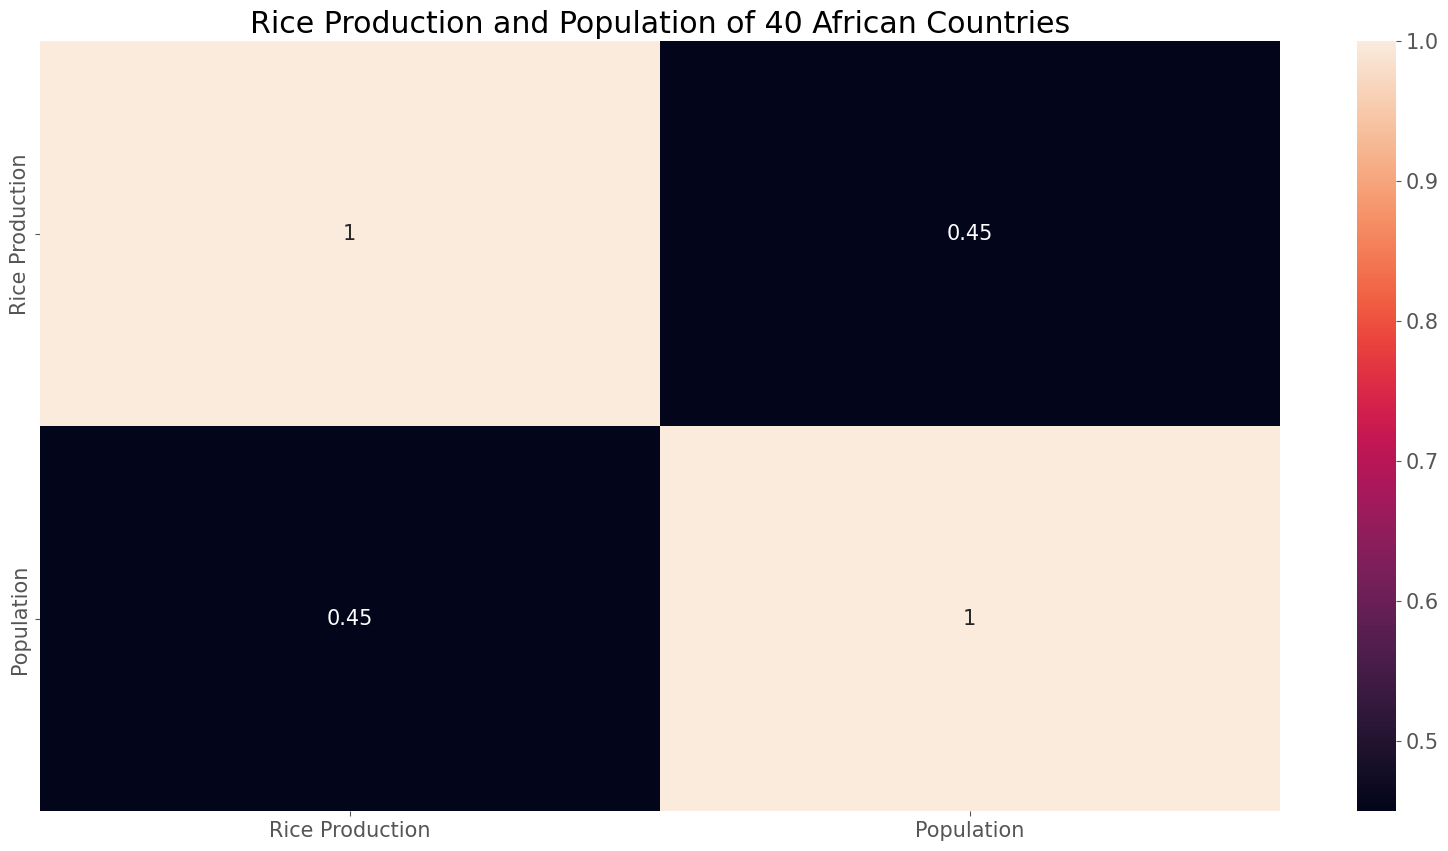

In [230]:
#Visualing the correlation
plt.figure(figsize=[20,10])
Rice_production_and_Population_Matrix = Rice_production_and_Population.corr(method = 'pearson')
sns.heatmap(Rice_production_and_Population_Matrix, annot = True)
plt.title('Rice Production and Population of 40 African Countries')
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.show()

We can see there is a strong correlation between rice production and population

In [231]:
Rice_production_and_Population

Rice Production  Population
Year                             
2004       225.818182    2.287057
2005       253.787879    2.351197
2006       274.848485    2.397659
2007       249.878788    2.417712
2008       307.818182    2.423648
2009       327.151515    2.425397
2010       383.454545    2.416239
2011       361.757576    2.431316
2012       398.484848    2.409788
2013       402.272727    2.359200

The table above illustrates a correlation between the rise in rice production and population growth. In 2004, rice production commenced at an average value of 225.818182 kilotons, steadily increasing to 402.272727 kilotons in tandem with the population growth.

In [232]:
x = np.array([225.818182, 253.787879, 274.848485, 249.878788, 307.818182, 327.151515, 383.454545,
              361.757576, 398.484848, 402.272727])

y = np.array([1.729988e+07, 1.773252e+07, 1.818038e+07, 1.864532e+07, 1.912565e+07, 1.962065e+07,
              2.012751e+07, 2.064788e+07, 2.118110e+07, 2.172376e+07])

pearsonr(x, y)

PearsonRResult(statistic=0.9616987161900885, pvalue=8.989369037815953e-06)

In [233]:
x = np.array([225.818182, 253.787879, 274.848485, 249.878788, 307.818182, 327.151515, 383.454545,
              361.757576, 398.484848, 402.272727])

y = np.array([1.729988e+07, 1.773252e+07, 1.818038e+07, 1.864532e+07, 1.912565e+07, 1.962065e+07,
              2.012751e+07, 2.064788e+07, 2.118110e+07, 2.172376e+07])

pearsonr(x, y)

PearsonRResult(statistic=0.9616987161900885, pvalue=8.989369037815953e-06)

In [234]:
pd.DataFrame(pearsonr(y,x),index= (['Statistic', 'P-Value']), columns=['Pearson Correlation'])

Pearson Correlation
Statistic             0.961699
P-Value               0.000009

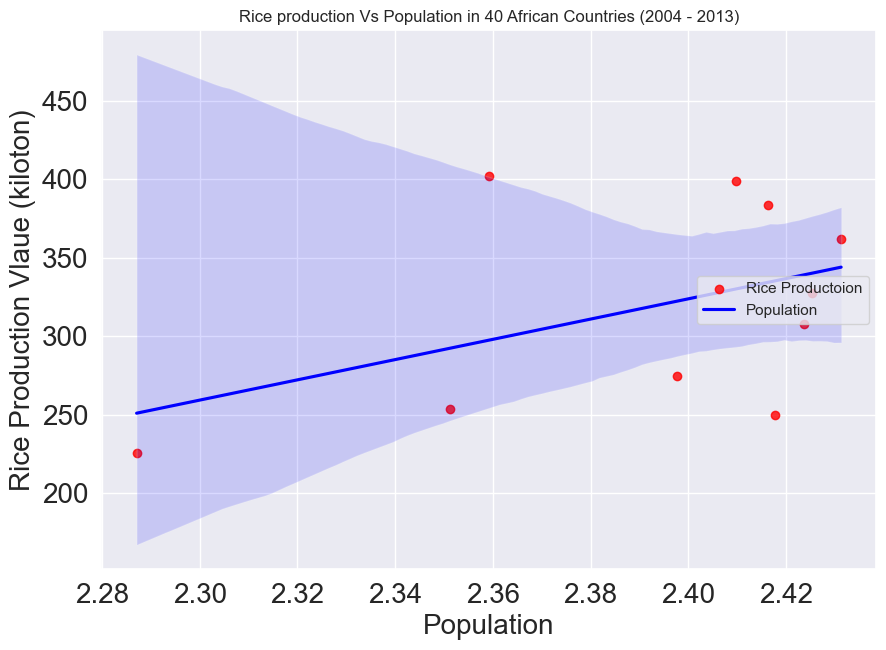

In [240]:
# Visualization using scatterplot to show relationshiip between rice production and population
sns.regplot( x='Population', y='Rice Production', data=Rice_production_and_Population, scatter_kws={'color': 'red'}, 
            line_kws={'color': 'blue'})
plt.title('Rice production Vs Population in 40 African Countries (2004 - 2013)')
plt.ylabel('Rice Production Vlaue (kiloton)')
plt.xlabel('Population')
plt.legend(['Rice Productoion', 'Population'], loc='center right')

Conclusively we can say that as population increase rice production increased

In [241]:
# Creating a dataframe to store the sum of yearly production value

foodprodd = pd.DataFrame(food_production.groupby(['Year'])['Value'].sum()).reset_index()
foodprodd

Year   Value
0  2004  550964
1  2005  574341
2  2006  595992
3  2007  579264
4  2008  607288
5  2009  615297
6  2010  652532
7  2011  673646
8  2012  696651
9  2013  725686

In [242]:
# Renaming the Value column of foodproduction
foodprodd.rename(columns={'Value': 'Production Value'}, inplace = True)

In [243]:
# Creating a dataframe to store the sum of yearly supply value
foodsuppply = pd.DataFrame(food_supply.groupby(['Year'])['Value'].sum()).reset_index()
foodsuppply

Year   Value
0  2004  107740
1  2005  108418
2  2006  109386
3  2007  110149
4  2008  110734
5  2009  111700
6  2010  112383
7  2011  113194
8  2012  113744
9  2013  113951

In [244]:
# Renaming the Value column of food supply
foodsuppply.rename(columns={'Value': 'Supply Value'}, inplace = True)
# Renaming the Year column of food supply to enable be delete it 
foodsuppply.rename(columns={'Year': 'year'}, inplace = True)

In [245]:
foodsuppply

year  Supply Value
0  2004        107740
1  2005        108418
2  2006        109386
3  2007        110149
4  2008        110734
5  2009        111700
6  2010        112383
7  2011        113194
8  2012        113744
9  2013        113951

In [246]:
Rice_production_and_Supply=pd.concat([foodprodd, foodsuppply], axis=1)
Rice_production_and_Supply

Year  Production Value  year  Supply Value
0  2004            550964  2004        107740
1  2005            574341  2005        108418
2  2006            595992  2006        109386
3  2007            579264  2007        110149
4  2008            607288  2008        110734
5  2009            615297  2009        111700
6  2010            652532  2010        112383
7  2011            673646  2011        113194
8  2012            696651  2012        113744
9  2013            725686  2013        113951

In [247]:
# Removing one of the year column
Rice_production_and_Supply=Rice_production_and_Supply.drop('year', axis = 1)
Rice_production_and_Supply

Year  Production Value  Supply Value
0  2004            550964        107740
1  2005            574341        108418
2  2006            595992        109386
3  2007            579264        110149
4  2008            607288        110734
5  2009            615297        111700
6  2010            652532        112383
7  2011            673646        113194
8  2012            696651        113744
9  2013            725686        113951

In [248]:
Rice_production_and_Supply.corr(method = 'pearson')

Year  Production Value  Supply Value
Year              1.000000          0.971942      0.995472
Production Value  0.971942          1.000000      0.954570
Supply Value      0.995472          0.954570      1.000000

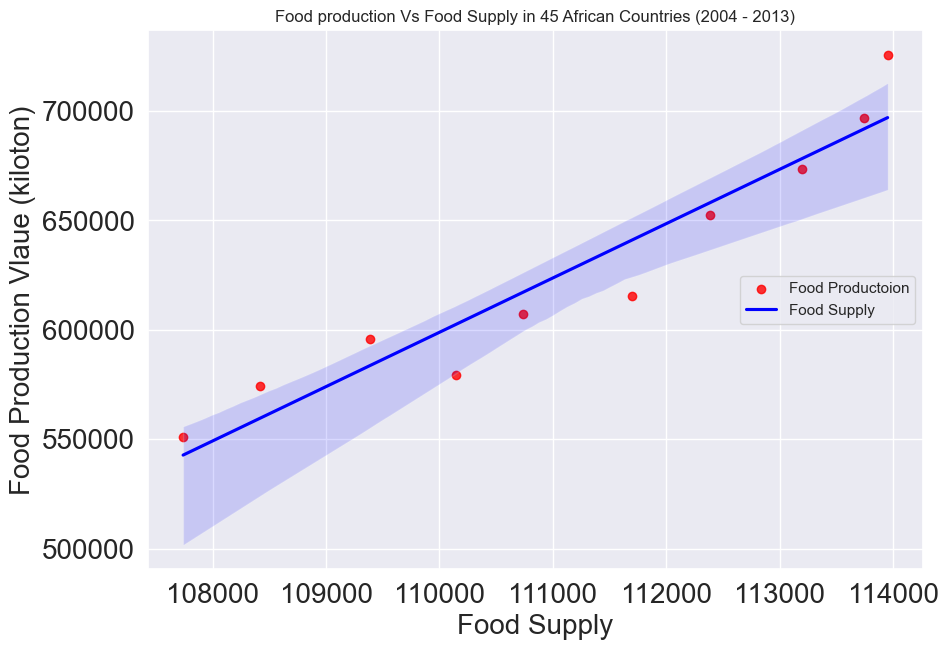

In [249]:
# Visualization using scatterplot to show relationshiip between food production and supply
sns.regplot( x='Supply Value', y='Production Value', data=Rice_production_and_Supply, scatter_kws={'color': 'red'}, 
            line_kws={'color': 'blue'})
plt.title('Food production Vs Food Supply in 45 African Countries (2004 - 2013)')
plt.ylabel('Food Production Vlaue (kiloton)')
plt.xlabel('Food Supply')
plt.legend(['Food Productoion', 'Food Supply'], loc='center right')

We can see that food production is higher than food supply

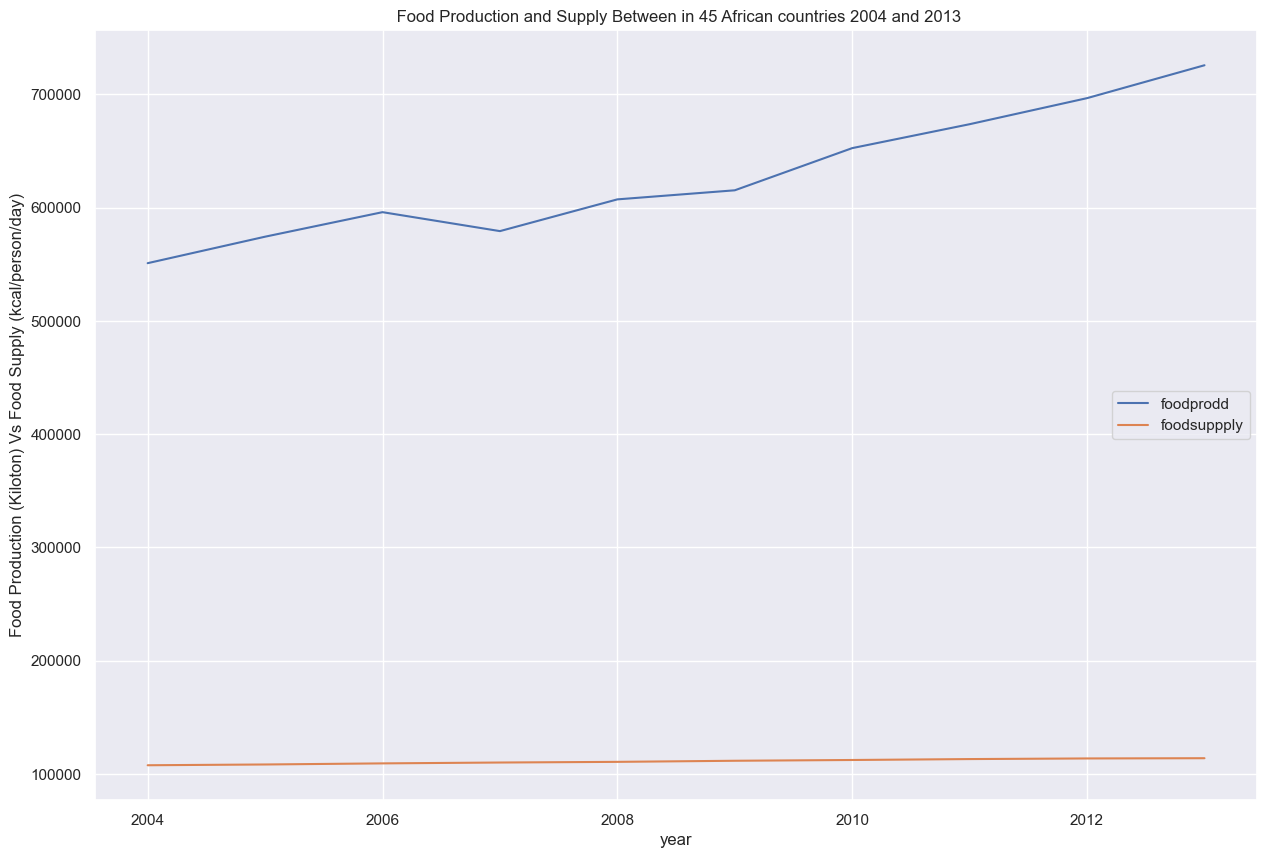

In [250]:
# Visualization to show the food production and food supply 
sns.set(rc={"figure.figsize":(15, 10)})

ax =foodprodd.plot(y='Production Value', x='Year')
foodsuppply.plot(ax=ax, y='Supply Value', x='year')
plt.ylabel('Food Production (Kiloton) Vs Food Supply (kcal/person/day)')
plt.title(' Food Production and Supply Between in 45 African countries 2004 and 2013')
plt.legend(['foodprodd', 'foodsuppply'], loc='center right')
plt.show()

# Findings/Conclusion

* Food production in Africa experienced an upward trend over the years.

* Between 2004 and 2013, Nigeria, Egypt, and South Africa emerged as the leading food-producing nations in Africa, generating 1,628,030 kt, 877,498 kt, and 597,592 kt of food items, respectively. Notably, many other countries fell short of producing even half of Nigeria's output.

* The most cultivated food items included Cassava, Sugar Cane, Maize and its derivatives, Yam, Vegetables, and Milk (excluding butter). Conversely, the least produced items comprised Cloves, Pepper, Molluscs, Fish, Liver oil, and aquatic animals.

* Nigeria is the top cassava producing country with a total of 452,881 kiloton followed by Ghana with total cassava production of 121,026 and Angola with 121,026.

* South Africa is the top Maize producing country from 2004 to 2013 having a total production of 107,343 kt followed by Nigeria with total of 76,898 kt, Egypt 70,993 kt.

* Egypt is the top rice producing country having a total production of 40,370 kiloton followed by Nigeria with 26,964 kiloton and Madagascar with 26,118 kiloton.

* A total of 39 countries consistently demonstrated substantial food production levels from 2004 to 2013, including Algeria, Angola, Benin, Burkina Faso, Cameroon, Central African Republic, Chad, Congo, Cote d'Ivoire, Egypt, Ethiopia, Gabon, Ghana, Guinea, Guinea-Bissau, Kenya, Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Swaziland, Togo, Tunisia, Uganda, the United Republic of Tanzania, Zambia, and Zimbabwe.

* The overall food supply in Africa increased over the years.

* Egypt, Tunisia, and Morocco boasted the highest food supplies between 2004 and 2013, challenging the assumption that being the largest food producer necessarily correlates with the highest food supply.

* Nigeria consistently emerged as the top Cassava and products producer, averaging 45,288 kt of Cassava. While Ghana, Angola, and Mozambique were also Cassava-producing countries, their output did not reach half of Nigeria's production.

* Nigeria led in beverage production, followed by Burkina Faso and Uganda, although their production was less than half of Nigeria's.

* Interestingly, the highest food-producing countries experienced food surpluses that went underutilized, contributing to food shortages.

* In the detection of an outlier country in 2012, Egypt stood out with a significantly larger supply of food accessible for consumption.

* Hypothesis testing results indicate a strong linear correlation between rice and cassava production and the increase in the African population.
